# Project Topic: University Students’ Complaints Classification using Natural Language Processing and Machine Learning Techniques

# 1. Preparing the tools

Importing all the required libraries 

- pandas for data analysis.
- NumPy for numerical operations.
- Matplotlib, seaborn, wordcloud for plotting or data visualization.
- NLTK, Spacy for text preprocessing
- Scikit-Learn for machine learning modelling and evaluation.

In [1]:
# Regular EDA and plotting libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import matplotlib.gridspec as gridspec

# Text pre-processing libraries
import re, nltk, string
from collections import Counter
nltk.download('stopwords') 
from nltk.corpus import stopwords 
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import spacy
import scipy
from scipy import sparse
from scipy.sparse import csr_matrix

# Text vectorization (Feature extraction) libraries
import gensim
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Data Imbalance fixing
from imblearn.over_sampling import RandomOverSampler

# Classifier Models
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

# Model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import time 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cloud\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Cloud\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 2. Load Data

Loading the dataset csv file 'Datasetprojpowerbi.csv' with Pandas built-in function

In [2]:
# Loading the dataset
df = pd.read_csv('Datasetprojpowerbi.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Genre    1005 non-null   object 
 1   Reports  1005 non-null   object 
 2   Age      1005 non-null   int64  
 3   Gpa      1005 non-null   float64
 4   Year     1005 non-null   int64  
 5   Count    1005 non-null   int64  
 6   Gender   1005 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 55.1+ KB


#### Information from the dataset highlighted below

 - There are 1005 records (1005 entries)
 - There are 7 attributes (Genre, Reports, Age, Gpa, Year, Count and Gender)
 - There is no null values in all the attributes for all the 1005 records
 - Genre, Reports and Genre attributes are text while Age, Gpa and Year are numerical.

#### Description of the columns summarized below. 
- **Genre:** Indicates the predefined class/category for the complaint. This is the target variable (label)
-**Reports:** Contains the detailed description of the student complaints or report. It contains the features that will be used   to train the model to predict the complaint class. 
-**Gpa:** Denotes the grade point average (GPA) which is the academic performance of a student.
-**Year:** Indicates the academic year or level of a student.
-**Count:** Represents a count or indicator variable.
-**Gender:** Indicates the gender of a student.

# 3. Data Exploration (exploratory data analysis or EDA)

The 7 attributes will be explored here. Comparison will be made among different attributes (independent varibales) and compare them to the target variable 'Genre'. The aim is to understand what factors influence the categories of complaints made by students. Different plots will be used to visualize and understand the trend between the attributes better.

A new column (8th column) will be created called GPA category. It will categorize a student into a GPA band based on the value of their GPA in the 'Gpa' column. The students are splitted into 3 GPA categories: Below-Avearge (Gpa less than 2.5),Average (Gpa between 2.5 and 3.5) and Above-Average (Gpa Greater tha 3.5). This is to aid a better understanding of the complaint category based on student academic performance.

In [3]:
"""Splitting the GPA into 3 categories and creating a new column 'Gpa_cat' for the GPA category: 
      Below-Avearge (less than 2.5), 
      Average (between 2.5 and 3.5) 
 and Above-Average (Greater tha 3.5)"""

def Gpa_cat_fun(x):
    if x<2.5:return "Below-Average"
    elif x<3.5:return "Average"
    else :return "Above-Average"
df["Gpa_cat"]=df.Gpa.apply(Gpa_cat_fun)

df.Gpa_cat.value_counts()

Below-Average    604
Average          255
Above-Average    146
Name: Gpa_cat, dtype: int64

In [4]:
df.sample(10)

Genre  \
159  Academic Support and Resources   
269            Athletics and sports   
776      Housing and Transportation   
872               Food and Cantines   
383            Career opportunities   
707                 Online learning   
742                 Student Affairs   
1    Academic Support and Resources   
358            Career opportunities   
908               Food and Cantines   

                                               Reports  Age   Gpa  Year  \
159  Balancing work and academic responsibilities h...   23  0.29     1   
269  I'm concerned about the injuries that happen d...   21  1.62     5   
776  14. "The university should do more to provide ...   25  2.17     5   
872  6. "I love the variety of snacks available at ...   19  0.15     1   
383  The university needs to provide more support f...   23  0.03     5   
707  The online platform we use for classes is outd...   26  1.04     3   
742   "The student affairs office should provide on...   18  3.80     1   
1    I'm having trouble finding the course material...   23  3.11     2   
358  I am having trouble finding job opportunities ...   21  0.94     4   
908  14. "The cafeteria is always very crowded duri...   20  4.21     1   

     Count Gender        Gpa_cat  
159      1      M  Below-Average  
269      1      M  Below-Average  
776      1      F  Below-Average  
872      1      M  Below-Average  
383      1      F  Below-Average  
707      1      M  Below-Average  
742      1      M  Above-Average  
1        1      F        Average  
358      1      M  Below-Average  
908      1      F  Above-Average

In [5]:
# Check for missing values
print(df.isnull().sum())

Genre      0
Reports    0
Age        0
Gpa        0
Year       0
Count      0
Gender     0
Gpa_cat    0
dtype: int64


A recheck for null value. There are no null values in all the attributes for all the 1005 records. ALl the records have values for all the 8 columns

In [6]:
# Calculating summary statistics from the dataset's numerical attributes
print(df.describe())

               Age          Gpa         Year   Count
count  1005.000000  1005.000000  1005.000000  1005.0
mean     21.298507     2.088856     2.684577     1.0
std       3.338841     1.208738     1.461665     0.0
min      16.000000     0.010000     1.000000     1.0
25%      18.000000     1.080000     1.000000     1.0
50%      21.000000     2.110000     2.000000     1.0
75%      24.000000     3.090000     4.000000     1.0
max      27.000000     4.970000     5.000000     1.0


- **Age:** The university  students' ages range from 16 to 27 and an average age of about 21.
- **GPA:** The students' GPAs vary from 0.01 to 4.97, with a mean of 2.09. The GPA values seem to vary substantially, according to the computed standard deviation of 1.21.
- **Year:** The "Year" column reflects the academic year of the students and the value varies from 1 to 5, suggesting that they are undergraduates.
- **Count:** Since the value of the 'Count' column is always 1, it does not contain any useful information for the analysis. As a result, the 'Count' column will not be included in the analysis.

In [7]:
# Dropping 'count' column

df.drop('Count', axis=1, inplace=True)
df

Genre  \
0     Academic Support and Resources   
1     Academic Support and Resources   
2     Academic Support and Resources   
3     Academic Support and Resources   
4     Academic Support and Resources   
...                              ...   
1000               Food and Cantines   
1001               Food and Cantines   
1002               Food and Cantines   
1003               Food and Cantines   
1004               Food and Cantines   

                                                Reports  Age   Gpa  Year  \
0     The limited access to research databases and m...   27  2.18     2   
1     I'm having trouble finding the course material...   23  3.11     2   
2     It's frustrating to have limited access to res...   20  3.68     2   
3     I'm really struggling in one of my classes but...   20  1.30     2   
4      I am really struggling with understanding the...   26  2.50     2   
...                                                 ...  ...   ...   ...   
1000  26. I have been unable to find food that meets...   18  1.16     4   
1001  27. I have been unable to find food that I can...   20  4.05     2   
1002  28. I have been unable to find food that I enjoy.   22  1.86     3   
1003  29. I have been unable to find food that is he...   20  2.06     2   
1004  30. I have been unable to find food that is co...   21  2.58     1   

     Gender        Gpa_cat  
0         M  Below-Average  
1         F        Average  
2         F  Above-Average  
3         F  Below-Average  
4         F        Average  
...     ...            ...  
1000      M  Below-Average  
1001      M  Above-Average  
1002      M  Below-Average  
1003      M  Below-Average  
1004      M        Average  

[1005 rows x 7 columns]

In [8]:
#Checking the list of the complaint categories in the dataset
list(enumerate(df.Genre.unique()))

[(0, 'Academic Support and Resources'),
 (1, 'Athletics and sports'),
 (2, 'Career opportunities'),
 (3, 'Financial Support'),
 (4, 'Health and Well-being Support'),
 (5, 'International student experiences'),
 (6, 'Online learning'),
 (7, 'Student Affairs'),
 (8, 'Housing and Transportation'),
 (9, 'Activities and Travelling'),
 (10, 'Food and Cantines')]

There are 11 unique categories for the complaints and are listed above

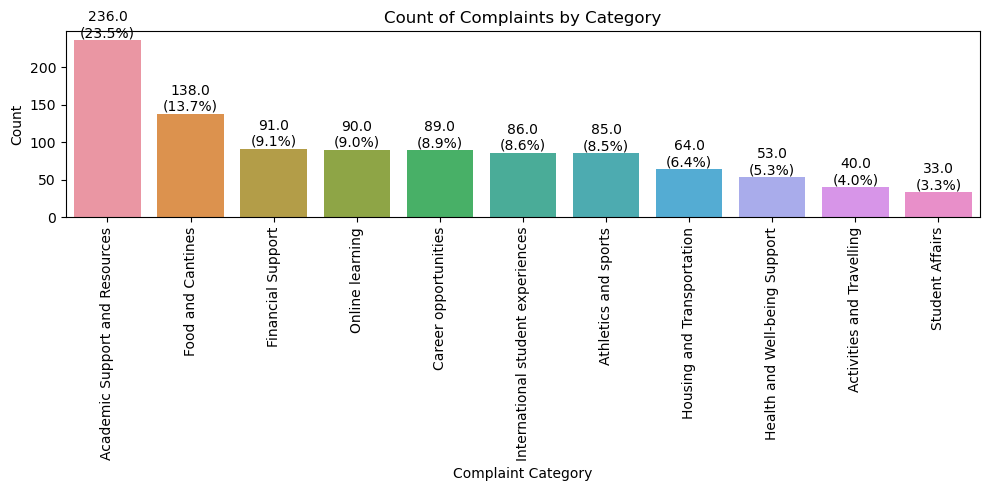

In [9]:
# Chekcing the count of records in the dataset for each genre (complaint category)

genre_counts = df['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Genre', y='Count', data=genre_counts)

total_count = genre_counts['Count'].sum()
for p in ax.patches:
    count = p.get_height()
    percentage = '{:.1f}%'.format(100 * count / total_count)
    label = f'{count}\n({percentage})'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(label, (x, y), ha='center', va='bottom')
    
plt.xlabel('Genre'), plt.ylabel('Count'), plt.title('Count of Complaints by Category')
plt.xlabel('Complaint Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- 'Academic Support and Resources' complaint has the high count and 'Student Affairs' is the lowest logged complaint
- The target variable (i.e. Genre) is highly imbalanced with 'Student Affairs' category having only 3.3% of total records.
- **Experiments will be done by building the classifiers with unbalanced data and also with balanced data for comparison of the performance for both models built with balanced and unbalanced data**

# 3.1 Demograhic characteristic analysis:
This is the analysis of the  composition of the student population using all the dataset attributes to identify any demographic patterns related to the complaints and reports.

## 3.1.1 Academic Year Vs Complaint Category

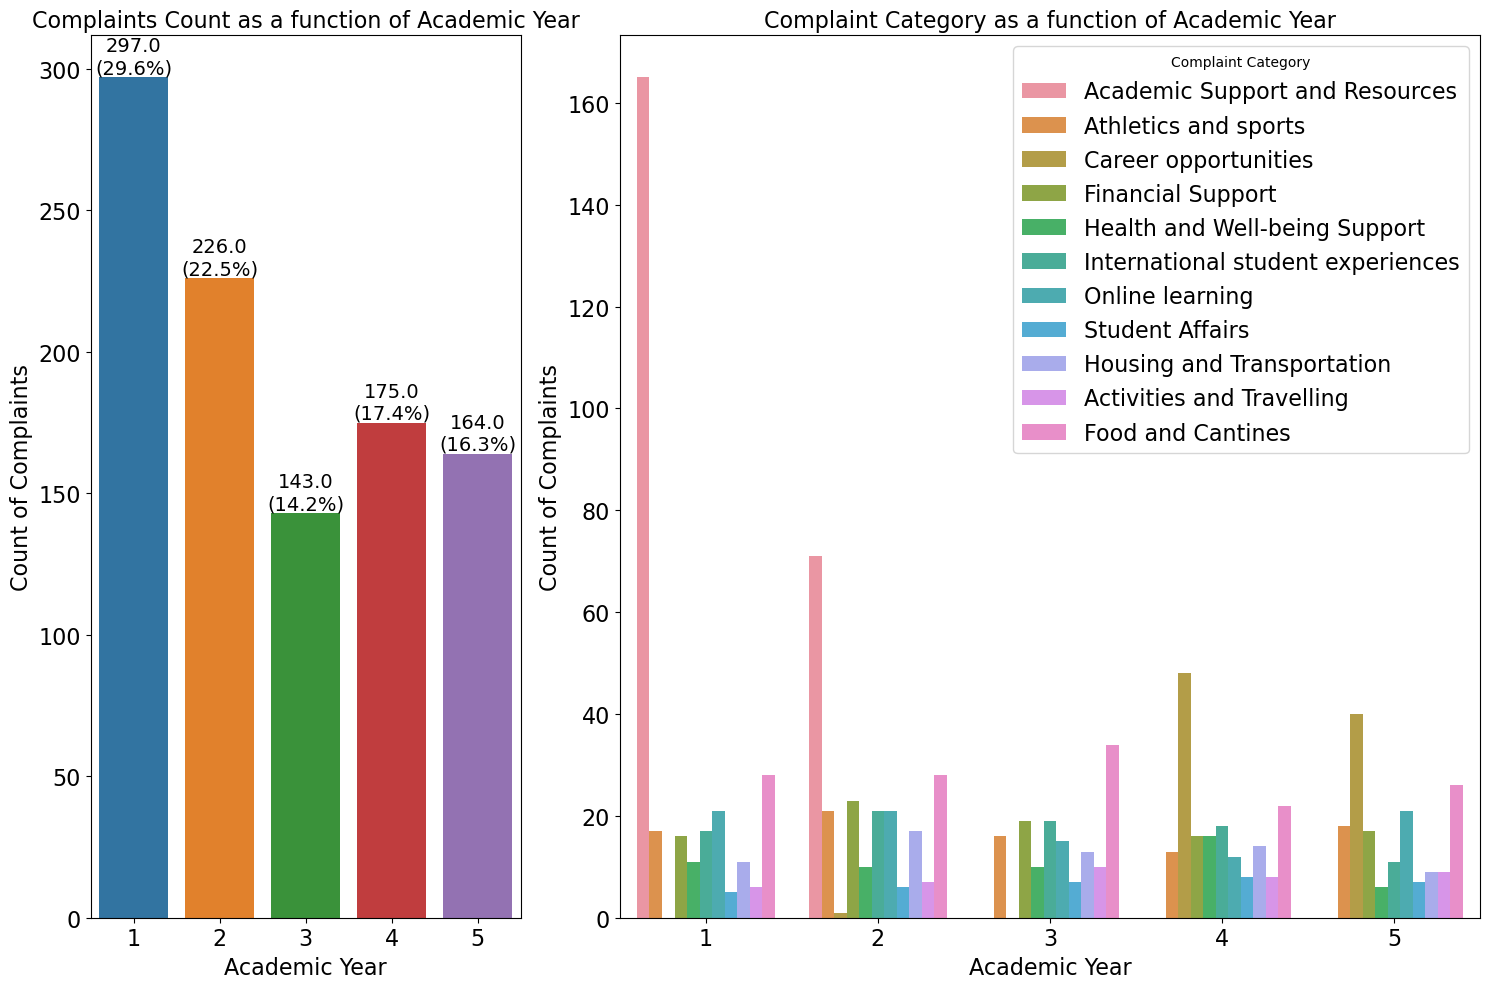

In [10]:
# Plot of Count of Compliant Category as a function of Academic Year
plt.figure(figsize=(15, 10))
grid = gridspec.GridSpec(1, 2, width_ratios=[1, 2])

# Complaints Count by Academic Year
plt.subplot(grid[0])
ax1 = sns.countplot(x=df.Year)
plt.title('Complaints Count as a function of Academic Year', fontsize=16)
plt.ylabel('Count of Complaints', fontsize=16)
plt.xlabel('Academic Year', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
for p in ax1.patches:
    count = p.get_height()
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(df.Year))
    label = f'{count}\n({percentage})'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax1.annotate(label, (x, y), ha='center', va='bottom', fontsize=14)

# Number of Complaints by Complaint Category and Academic Year
plt.subplot(grid[1])
ax2 = sns.countplot(data=df, x='Year', hue='Genre')
plt.xlabel('Academic Year', fontsize=16)
plt.ylabel('Count of Complaints', fontsize=16)
plt.title('Complaint Category as a function of Academic Year', fontsize=16)
plt.legend(title='Complaint Category', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()

plt.show()

From the countplot of Complaints Count as a function of Academic Year it can be inferred that:
- that Year 1 students had the greatest complaints (about 30%) in the dataset, followed by Year 2 students (around 23%). In terms of complaints from students in Years 3, 4, and 5, they each accounted for 16% on average. This can be because both Year 1 and Year 2 are still getting used to the academic environment and require additional assistance to adjust. It may be inferred that universities need to concentrate more on Year 1 and Year 2 students in order to provide them with more information, educational assistance, and resources.

From the countplot of Complaint Category as a function of Academic Year it can be inferred that:
- Only students in Year 1 and Year 2 have submitted complaints under the category "Academic Support and Resources." It supports the data in the first graph discussed above, and it follows logically that universities should give Year 1 and Year 2 students additional help in the form of academic resources and support. 
- All complaints under the "career opportunities" category except one come from students in Years 4 and 5. This is logical and true because both are close to finishing their undergraduate degrees and having professions in their respective fields of study on the horizon. Universities should think about how they may help their students with their careers by working with companies, offering materials and courses on careers, and offering internships and apprenticeships, among other things.

## 3.1.3 Complaint Category Vs GPA and GPA Category

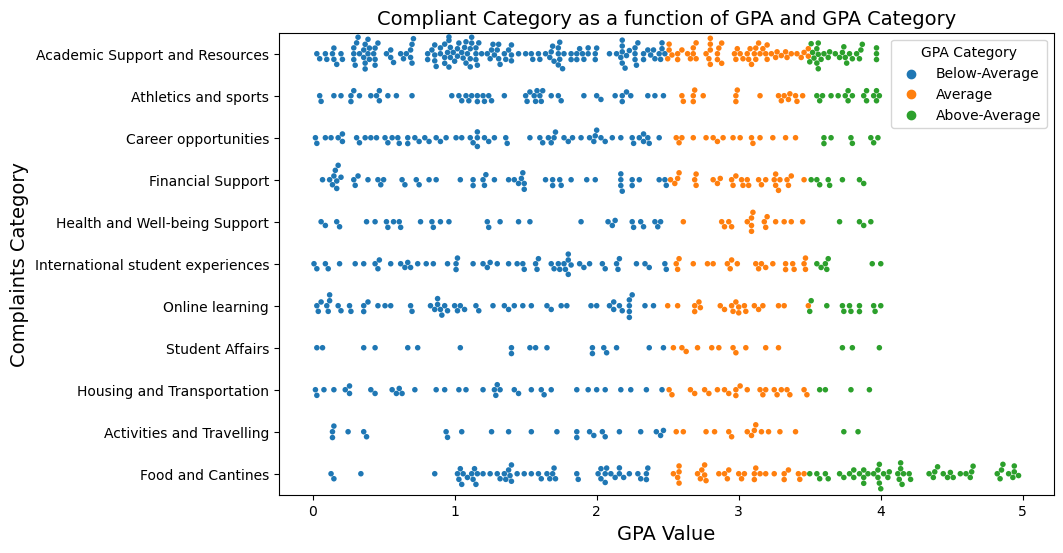

In [11]:
# Plot of Compliant Category as a function of GPA and GPA Category
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df,x='Gpa',y='Genre',hue='Gpa_cat',size=4)
plt.title('Compliant Category as a function of GPA and GPA Category', fontsize=14)
plt.ylabel('Complaints Category', fontsize=14)
plt.xlabel('GPA Value', fontsize=14)
plt.legend(title='GPA Category')
plt.show()

From the countplot of Complaints Category as a function of GPA and GPA Categoryabove, it can be inferred that 
- Students with below-average GPAs logged more than half (about 60%) of the complaint cases in the sample, whereas students with above-average GPAs logged the fewest. It is also inferred from the countplot that all the complaints logged by the students with GPA above 4% (high flyers) are in the "Food and Cantines" category. While it can be assumed that some of the high flyers are on scholarships that cover their housing and finances, preventing them from having complaints related to these categories, one of the university's core responsibilities is to help students excel in their academics and be above average, and it can be concluded that resolving the complaints made by the below-average students will alleviate their worries about the issues they are experiencing and will help them in improving.

## 3.1.4 Gender Vs Complaint Category

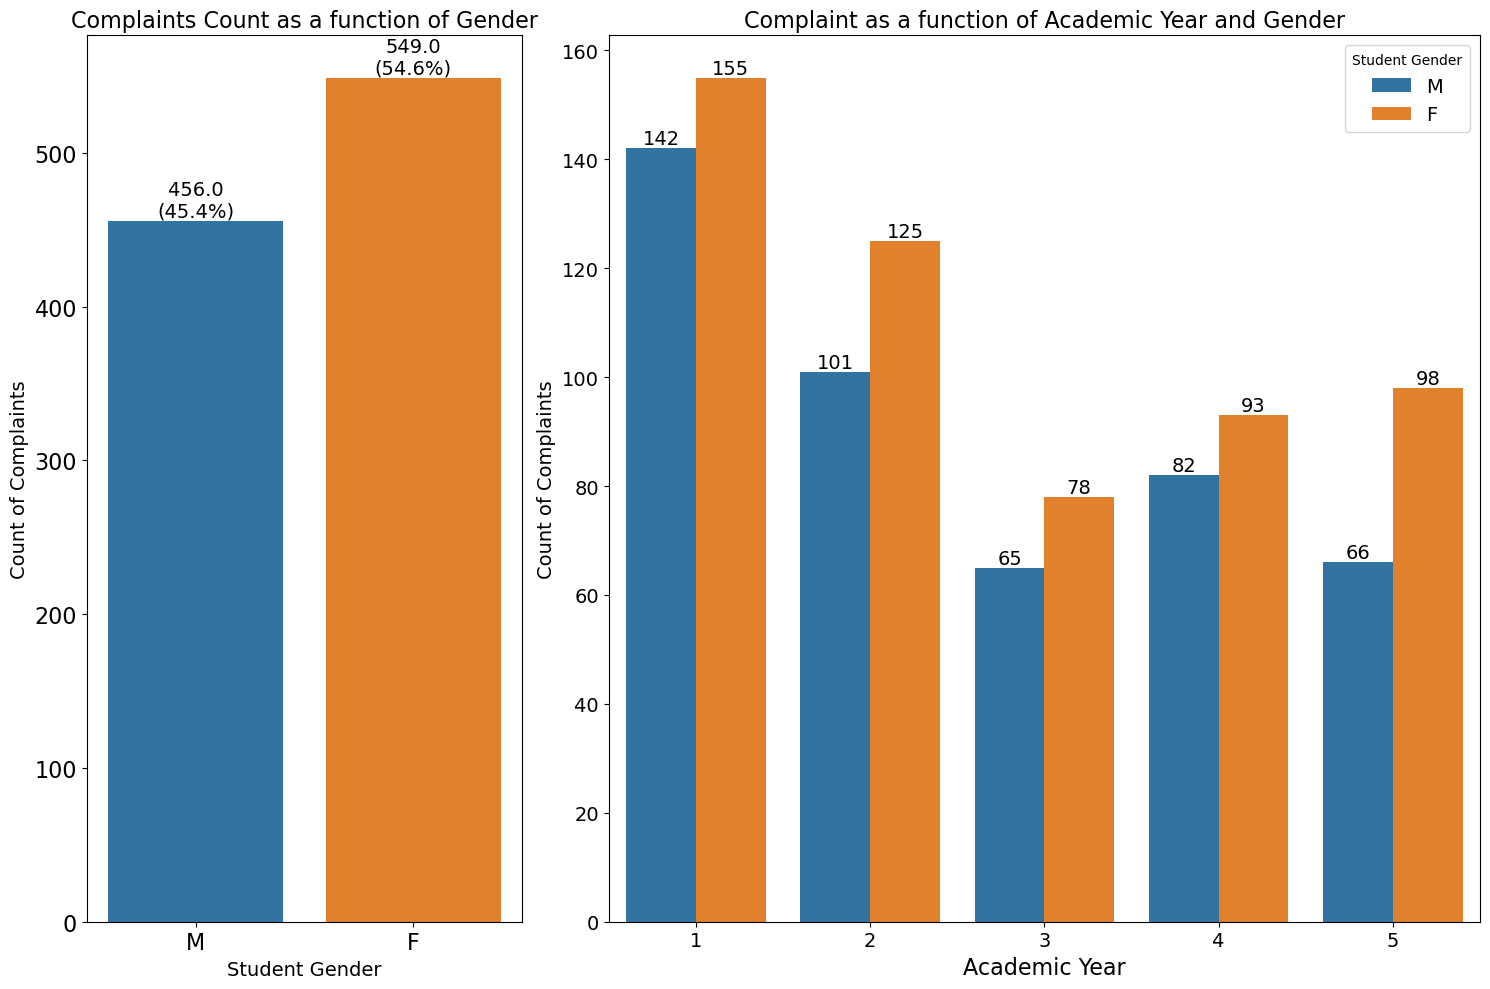

In [12]:
# Plot of Count of Compliant Category as a function of Student Gender and Academic Year
plt.figure(figsize=(15, 10))
grid = gridspec.GridSpec(1, 2, width_ratios=[1, 2])

# Complaints Count by Gender
plt.subplot(grid[0])
ax1 = sns.countplot(x=df.Gender)
plt.title('Complaints Count as a function of Gender', fontsize=16)
plt.ylabel('Count of Complaints', fontsize=14)
plt.xlabel('Student Gender', fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
for p in ax1.patches:
    count = p.get_height()
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(df.Year))
    label = f'{count}\n({percentage})'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax1.annotate(label, (x, y), ha='center', va='bottom', fontsize=14)

# Number of Complaints by Academic Year and Gender
plt.subplot(grid[1])
ax2 = sns.countplot(x=df.Year, hue=df.Gender)
plt.xlabel('Academic Year', fontsize=16)
plt.ylabel('Count of Complaints', fontsize=14)
plt.title('Complaint as a function of Academic Year and Gender', fontsize=16)
plt.legend(title='Student Gender', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for i in ax2.containers:
    ax2.bar_label(i,fontsize=14)
plt.tight_layout()
plt.show()

The count plots in Figure 11 below demonstrate the association between the complaint type, the academic year, and the gender of the student. The complaints count plotted against gender reveals that female students reported more complaints than male pupils. Female students registered more complaints than male students throughout all five academic years, according to a second count plot of complaints as a function of academic year and gender.

## 3.1.5 Comparison of complaints with Age, Gender and GPA Category attributes

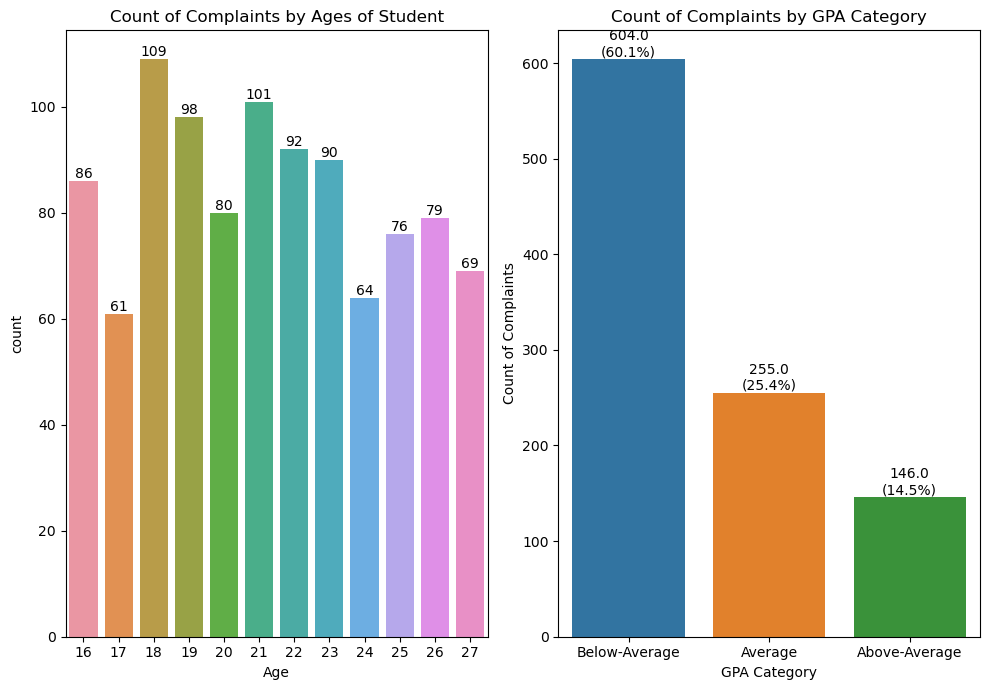

In [13]:
plt.figure(figsize=(10, 7))
plt.subplot(121)
ax = sns.countplot(x=df.Age)
plt.title("Count of Complaints by Ages of Student")
for i in ax.containers:
    ax.bar_label(i,)

plt.subplot(122)
ax = sns.countplot(x=df.Gpa_cat)
plt.title('Count of Complaints by GPA Category')
plt.xlabel("GPA Category")
plt.ylabel('Count of Complaints')
for p in ax.patches:
    count = p.get_height()
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(df.Gpa_cat))
    label = f'{count}\n({percentage})'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(label, (x, y), ha='center', va='bottom')
plt.tight_layout()
plt.show()

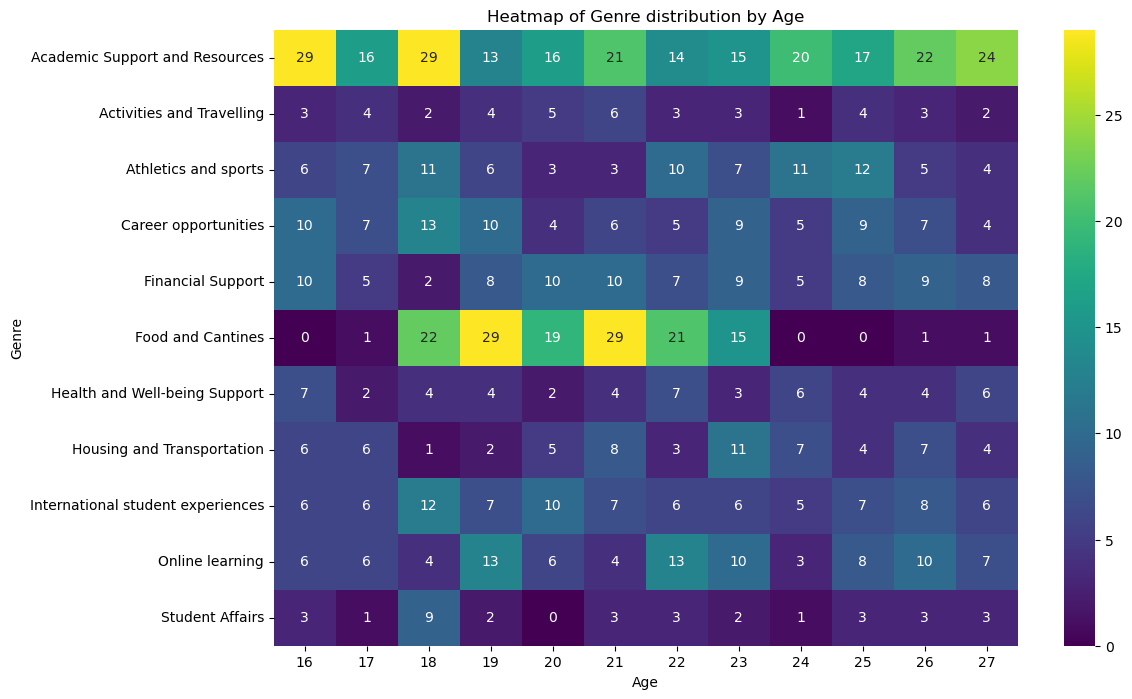

In [14]:
# Heatmap plot of Compliant Category as a function of Age and Complaint Category
heatmap_data = df.pivot_table(index='Genre', columns='Age', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', cbar=True)
plt.title('Heatmap of Genre distribution by Age')
plt.xlabel('Age')
plt.ylabel('Genre')
plt.show()

 - Number of compliants is moderately distributed among the student ages. Students aged 21 logged highest (109) and those aged 17 logged the lowest (61). In summary the complaints are modereately distributed among the different student ages. It can be inferred here that the complaints are not limited to a specific age.
 - More than 60% of the complaints are logged by students in Below-Average GPA category. Above-average student logged only 14.5% of the complaints. It can be inferred that the below-average students need more support from the university as some of the complaints made might be affecting their academic performance.
 - The heatmmap of Age against Genre shows that students between the ages of 18 and 23 logged approx. 98% (135 out of 138) of the complaints in 'food and cantines' category. Aside that it also shows that most of the complaints are from 'Academic Support and Resources' category and it is evenly distributed among all the ages, it also shows that the count of complaints among all the ages in the remaining categories are quite evenly distributed. 

# 3.2. NLP Data Analysis

This analysis explores the relation between the ‘Genre’ (Target variable) and the raw ‘Report’ (containing the text features that will be used to train the classifier models)

## 3.2.1  Analysis of the word count and character length of 'Reports' (which is the detailed complaint description)

In [15]:
#Claculating the count of words in each complaint
def complaint_wordcount(complaints):
    return len(complaints.split())

#Calculating the lenght of each complaint
def complaint_character_length(complaints):
    return len(complaints)

df['c_wordcount'] = df['Reports'].apply(complaint_wordcount)
df['c_chlength'] = df['Reports'].apply(complaint_character_length)

df.head()

Genre  \
0  Academic Support and Resources   
1  Academic Support and Resources   
2  Academic Support and Resources   
3  Academic Support and Resources   
4  Academic Support and Resources   

                                             Reports  Age   Gpa  Year Gender  \
0  The limited access to research databases and m...   27  2.18     2      M   
1  I'm having trouble finding the course material...   23  3.11     2      F   
2  It's frustrating to have limited access to res...   20  3.68     2      F   
3  I'm really struggling in one of my classes but...   20  1.30     2      F   
4   I am really struggling with understanding the...   26  2.50     2      F   

         Gpa_cat  c_wordcount  c_chlength  
0  Below-Average           26         160  
1        Average           24         138  
2  Above-Average           35         198  
3  Below-Average           31         165  
4        Average           24         140

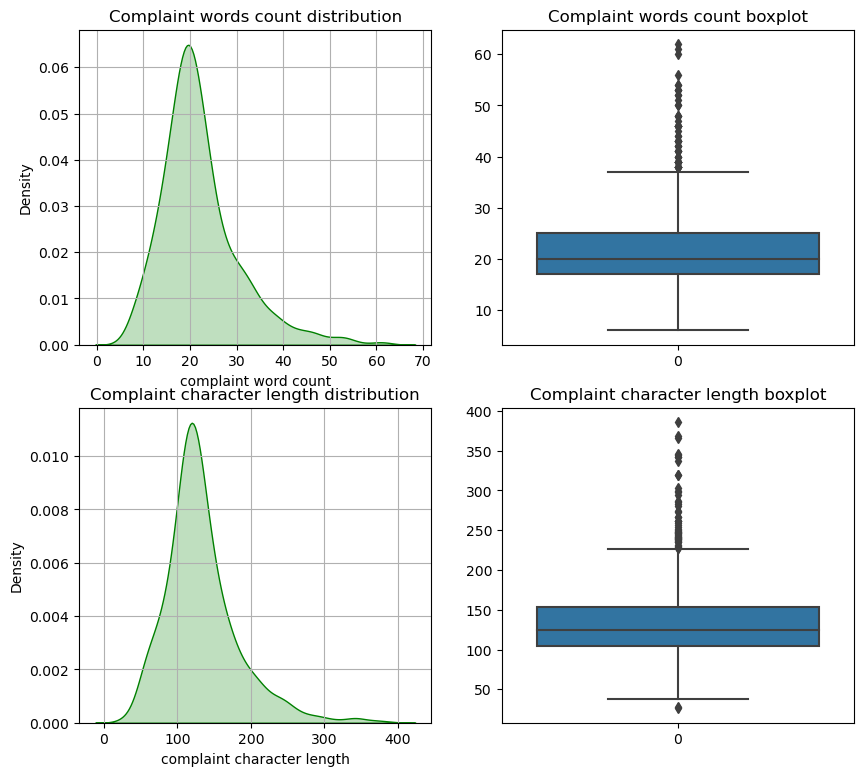

In [16]:
plt.figure(figsize=(10,9))

plt.subplot(221)
sns.kdeplot(df['c_wordcount'],color='g',fill=True)
plt.xlabel("complaint word count")
plt.title("Complaint words count distribution")
plt.grid(True) 

plt.subplot(222)
sns.boxplot(df['c_wordcount'])
plt.title('Complaint words count boxplot')


plt.subplot(223)
sns.kdeplot(df['c_chlength'],color='g',fill=True)
plt.xlabel("complaint character length")
plt.title('Complaint character length distribution')
plt.grid(True) 

plt.subplot(224)
sns.boxplot(df['c_chlength'])
plt.title('Complaint character length boxplot')
    
plt.show()

From the plots above, it can be seen for the word count that most of the complaints have between 17 and 25 words with 20 the median. For the character length, the median is 124 and most of the complaints have between 97 and 153 characters (between first quartile and third quartile). Outliers are observed and the boxplot below for the explains where the outliers are from. Most of the outliers are from the "Academic Support and Resources" complaint category.

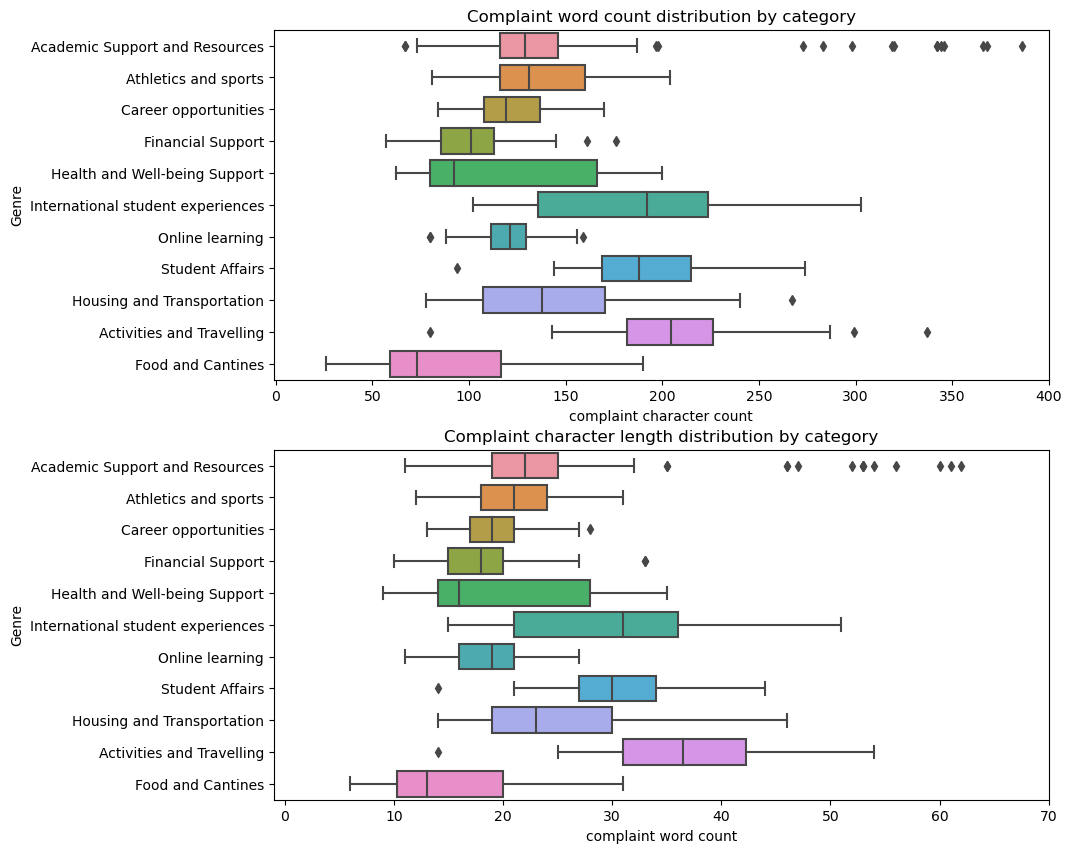

In [17]:
plt.figure(figsize=(10,10))

plt.subplot(211)
sns.boxplot(data=df, x='c_chlength', y='Genre').set_xlim(-1, 400)
plt.xlabel("complaint character count")
plt.title('Complaint word count distribution by category')

plt.subplot(212)
sns.boxplot(data=df, x='c_wordcount', y='Genre').set_xlim(-1, 70)
plt.xlabel("complaint word count")
plt.title('Complaint character length distribution by category')
plt.show()

In [18]:
# Combining all words of all the complaints into a list
unclean_wordlist = list()
for i in range(len(df)):
    temp = df.Reports[i].split()
    for k in temp:
        k = re.sub("[^a-zA-ZğĞüÜşŞıİöÖçÇ]","",k)
        if k != "":
            unclean_wordlist.append(k)

print(unclean_wordlist[:20]) #print 20 words in the unclean words list

['The', 'limited', 'access', 'to', 'research', 'databases', 'and', 'materials', 'is', 'causing', 'a', 'lot', 'of', 'frustration', 'among', 'students', 'We', 'need', 'better', 'access']


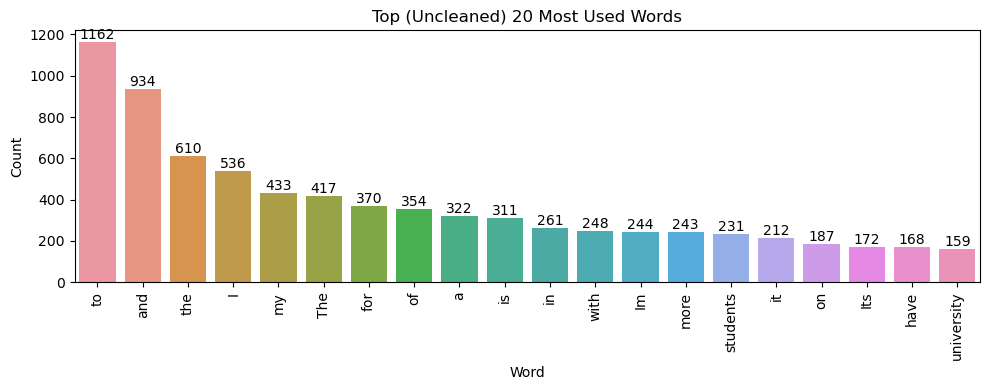

In [19]:
# Extracting and plotting the top 20 most used words.

wordcount = Counter(unclean_wordlist)
counted_word_dict = dict(wordcount)
sorted_word_dict = sorted(counted_word_dict.items(), key=lambda x: x[1], reverse=True)

top_20_words = [word for word, _ in sorted_word_dict[:20]]
top_20_counts = [counted for _, counted in sorted_word_dict[:20]]

plt.figure(figsize=(10, 4))
ax1 = sns.barplot(x=top_20_words, y=top_20_counts)
ax1.set(xlabel='Word', ylabel='Count')
ax1.set_title('Top (Uncleaned) 20 Most Used Words')
ax1.set_xticklabels(top_20_words, rotation=90)
for i in ax1.containers:
    ax1.bar_label(i,)
plt.tight_layout()
plt.show()

The top 20 words from all complaint reports are shown in the barplot above. It is evident these words that dominate among the top words, having no beneficial effect on the classification model. They will be removed during text pre-processing. In addition, as complaints from university students are the focus of the project, the terms "students" and "university" are generic to all of the complaints. Both words are not considered as keyword and will be eliminated during text pre-processing

# 4. NLP Text Pre-processing

Text preprocessing to clean up the noise in the detailed complaint text 'Report' will be done here to prepare the complaint for feature extraction. The processes to done are:
- lower-casing
- white space removal
- double space removal
- punctuation removal
- digit removal
- stop word removal and
- lemmatization

## 4.1 Implementing the text preprocessing

In [20]:
# Creating functions to implement the text pre-processing techniques

# 1. Converting complaint text to lowercase
def complaint_lowercasing(comp_text):
    return comp_text.lower()

# 2. Removing whitespaces in complaint text
def whitespace_removal(comp_text):
    return comp_text.strip()

# 3. Removing doublespace in complaint text
def doublespace_removal(comp_text):
    return re.sub(r'\s+', ' ', comp_text) # Remove double spaces using regular expressions

# 4. Removing punctuations
def punctuation_removal(comp_text):
    return re.sub(r'[^\w\s]', ' ', comp_text) # Using regular expressions to replace punctuations

# 5. Removing number(digits) in complaint texts
def digit_removal(comp_text):
    return re.sub(r'\d+', '', comp_text) # Remove digits using regular expressions

# 6. Function to remove stopwords from the complaint text
stop_english = stopwords.words("english")
other_words_to_take_out = ['school', 'students', 'college', 'university']
stop_english.extend(other_words_to_take_out)
def stopwords_removal(comp_text):
    return " ".join([word for word in word_tokenize(comp_text) if word not in stop_english])

# 7. Function for the lemmatization of the complaint text using SpaCy built-in function 
spacy_lemma = spacy.load("en_core_web_sm", disable = ['parser', 'ner'])
def complaint_lemmatizer(comp_text):
    lemma_complaint = " ".join([token.lemma_ for token in spacy_lemma(comp_text)])
    return lemma_complaint

In [21]:
# Combination of all the text pre-processing steps into a single function

def complaint_normalizer(comp_text):
    comp_text = complaint_lowercasing(comp_text)
    comp_text = whitespace_removal(comp_text)
    comp_text = doublespace_removal(comp_text)
    comp_text = punctuation_removal(comp_text)
    comp_text = digit_removal(comp_text)
    comp_text = stopwords_removal(comp_text)
    comp_text = complaint_lemmatizer(comp_text)
    return comp_text

In [22]:
# Implementing text preprocessing and normalization

df['normalized_complaint'] = df['Reports'].apply(complaint_normalizer)
df['wordcount_clean'] = df['normalized_complaint'].apply(complaint_wordcount)
df['chlength_clean'] = df['normalized_complaint'].apply(complaint_character_length)
df.head()

Genre  \
0  Academic Support and Resources   
1  Academic Support and Resources   
2  Academic Support and Resources   
3  Academic Support and Resources   
4  Academic Support and Resources   

                                             Reports  Age   Gpa  Year Gender  \
0  The limited access to research databases and m...   27  2.18     2      M   
1  I'm having trouble finding the course material...   23  3.11     2      F   
2  It's frustrating to have limited access to res...   20  3.68     2      F   
3  I'm really struggling in one of my classes but...   20  1.30     2      F   
4   I am really struggling with understanding the...   26  2.50     2      F   

         Gpa_cat  c_wordcount  c_chlength  \
0  Below-Average           26         160   
1        Average           24         138   
2  Above-Average           35         198   
3  Below-Average           31         165   
4        Average           24         140   

                                normalized_complaint  wordcount_clean  \
0  limit access research database material cause ...               15   
1  trouble find course material need class librar...               10   
2  frustrating limited access research database m...               15   
3  really struggle one class get appointment acad...               15   
4  really struggle understand instruction assignm...                8   

   chlength_clean  
0             110  
1              69  
2             115  
3              95  
4              67

'normalized_complaint' column contains the fully preprocessed complaint report after appling 7 text preprocessing techniques

## 4.2 Analysing the clean pre-processed text

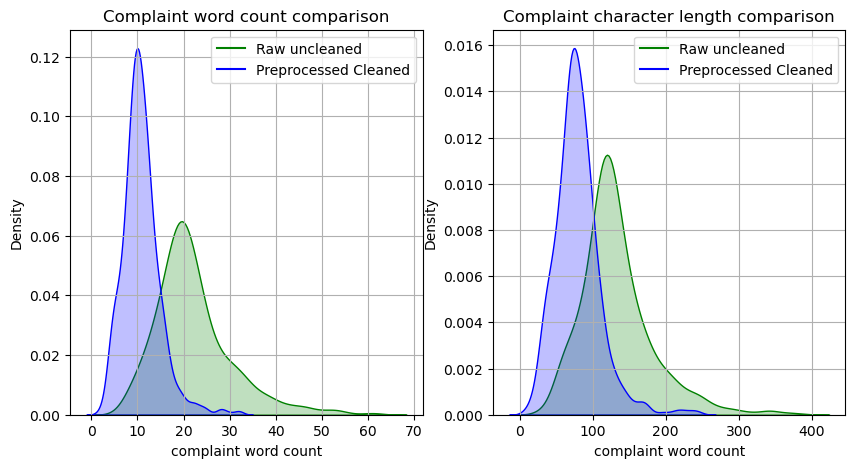

In [23]:
# Word count and character length count comparison using kdeplot
plt.figure(figsize=(10,5))

plt.subplot(121)
sns.kdeplot(df['c_wordcount'],color='g',fill=True)
sns.kdeplot(df['wordcount_clean'],color='b',fill=True)
plt.plot([], [], color='g', label='Raw uncleaned')
plt.plot([], [], color='b', label='Preprocessed Cleaned')
plt.xlabel("complaint word count")
plt.title('Complaint word count comparison')
plt.legend()
plt.grid(True) 

plt.subplot(122)
sns.kdeplot(df['c_chlength'],color='g',fill=True)
sns.kdeplot(df['chlength_clean'],color='b',fill=True)
plt.plot([], [], color='g', label='Raw uncleaned')
plt.plot([], [], color='b', label='Preprocessed Cleaned')
plt.xlabel("complaint word count")
plt.title('Complaint character length comparison')
plt.legend()
plt.grid(True) 
plt.show()

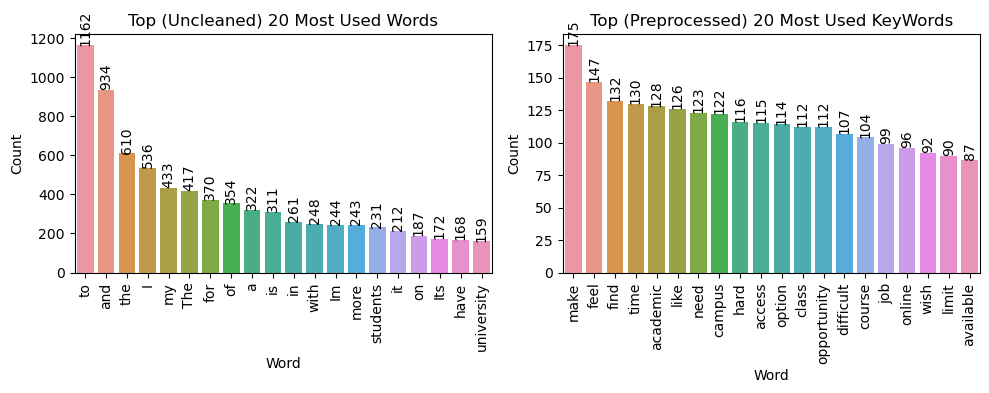

In [24]:
# Combining all words of all the preprocessed complaints into a list
wordlist_clean = list()
for i in range(len(df)):
    temp = df.normalized_complaint[i].split()
    for k in temp:
        k = re.sub("[^a-zA-ZğĞüÜşŞıİöÖçÇ]","",k)
        if k != "":
            wordlist_clean.append(k)

# Extracting the top 20 most used preprocessed keywords.
wordcount_clean = Counter(wordlist_clean)
counted_worddict_clean = dict(wordcount_clean)
sorted_worddict_clean = sorted(counted_worddict_clean.items(), key=lambda x: x[1], reverse=True)

top_20_words_clean = [word for word, _ in sorted_worddict_clean[:20]]
top_20_counts_clean = [counted for _, counted in sorted_worddict_clean[:20]]

#Plotting the Top 20 most used uncleaned words and Top 20 most used preprocessed keywords for comparison
plt.figure(figsize=(10, 4))
plt.subplot(121)
ax1 = sns.barplot(x=top_20_words, y=top_20_counts)
ax1.set(xlabel='Word', ylabel='Count')
ax1.set_title('Top (Uncleaned) 20 Most Used Words')
ax1.set_xticklabels(top_20_words, rotation=90)
for i in ax1.containers:
    ax1.bar_label(i,rotation=90)
plt.subplot(122)
ax2 = sns.barplot(x=top_20_words_clean, y=top_20_counts_clean)
ax2.set(xlabel='Word', ylabel='Count')
ax2.set_title('Top (Preprocessed) 20 Most Used KeyWords')
ax2.set_xticklabels(top_20_words_clean, rotation=90)
for i in ax2.containers:
    ax2.bar_label(i, rotation=90)
plt.tight_layout()
plt.show()

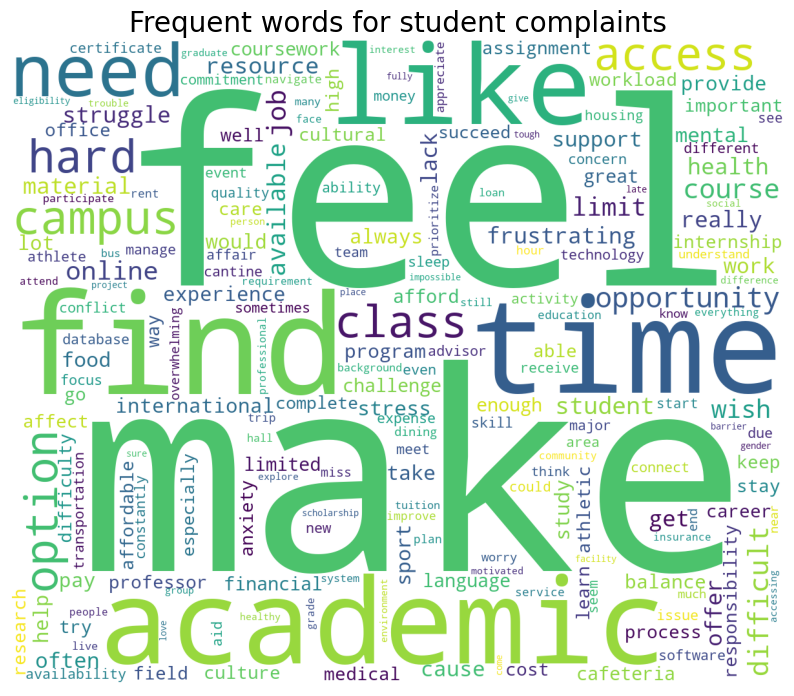

In [25]:
# Word Cloud to show the common keywords after preprocessing

from wordcloud import WordCloud, STOPWORDS
common_complaints =' '.join(wordlist_clean)

wordcloud = WordCloud(collocations=False, stopwords=stop_english,
                      background_color='white',
                      width=1200,
                      height=1000).generate(common_complaints)

plt.figure( figsize=(10,12) )
plt.imshow(wordcloud)
plt.title('Frequent words for student complaints', fontsize = 20)
plt.axis('off')
plt.show()

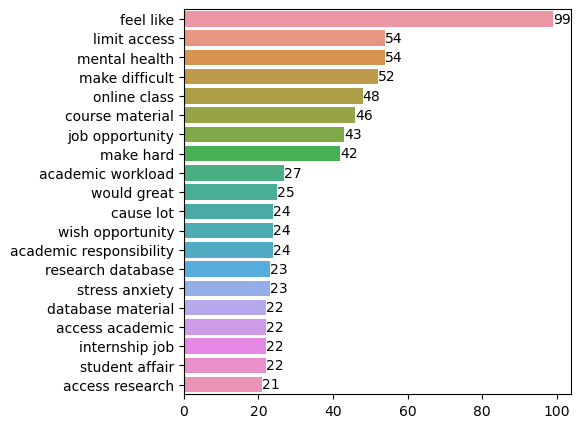

In [26]:
# Taking at a look at the 20 top most used bi-gram (2 consective words used) after pre-processing
def get_top_complaint_bigrams(complaint, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(complaint)
    bag_of_words = vec.transform(complaint)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

plt.figure(figsize=(5,5))
top_complaint_bigrams=get_top_complaint_bigrams(df['normalized_complaint'])[:20]
x,y=map(list,zip(*top_complaint_bigrams))
ax=sns.barplot(x=y,y=x)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

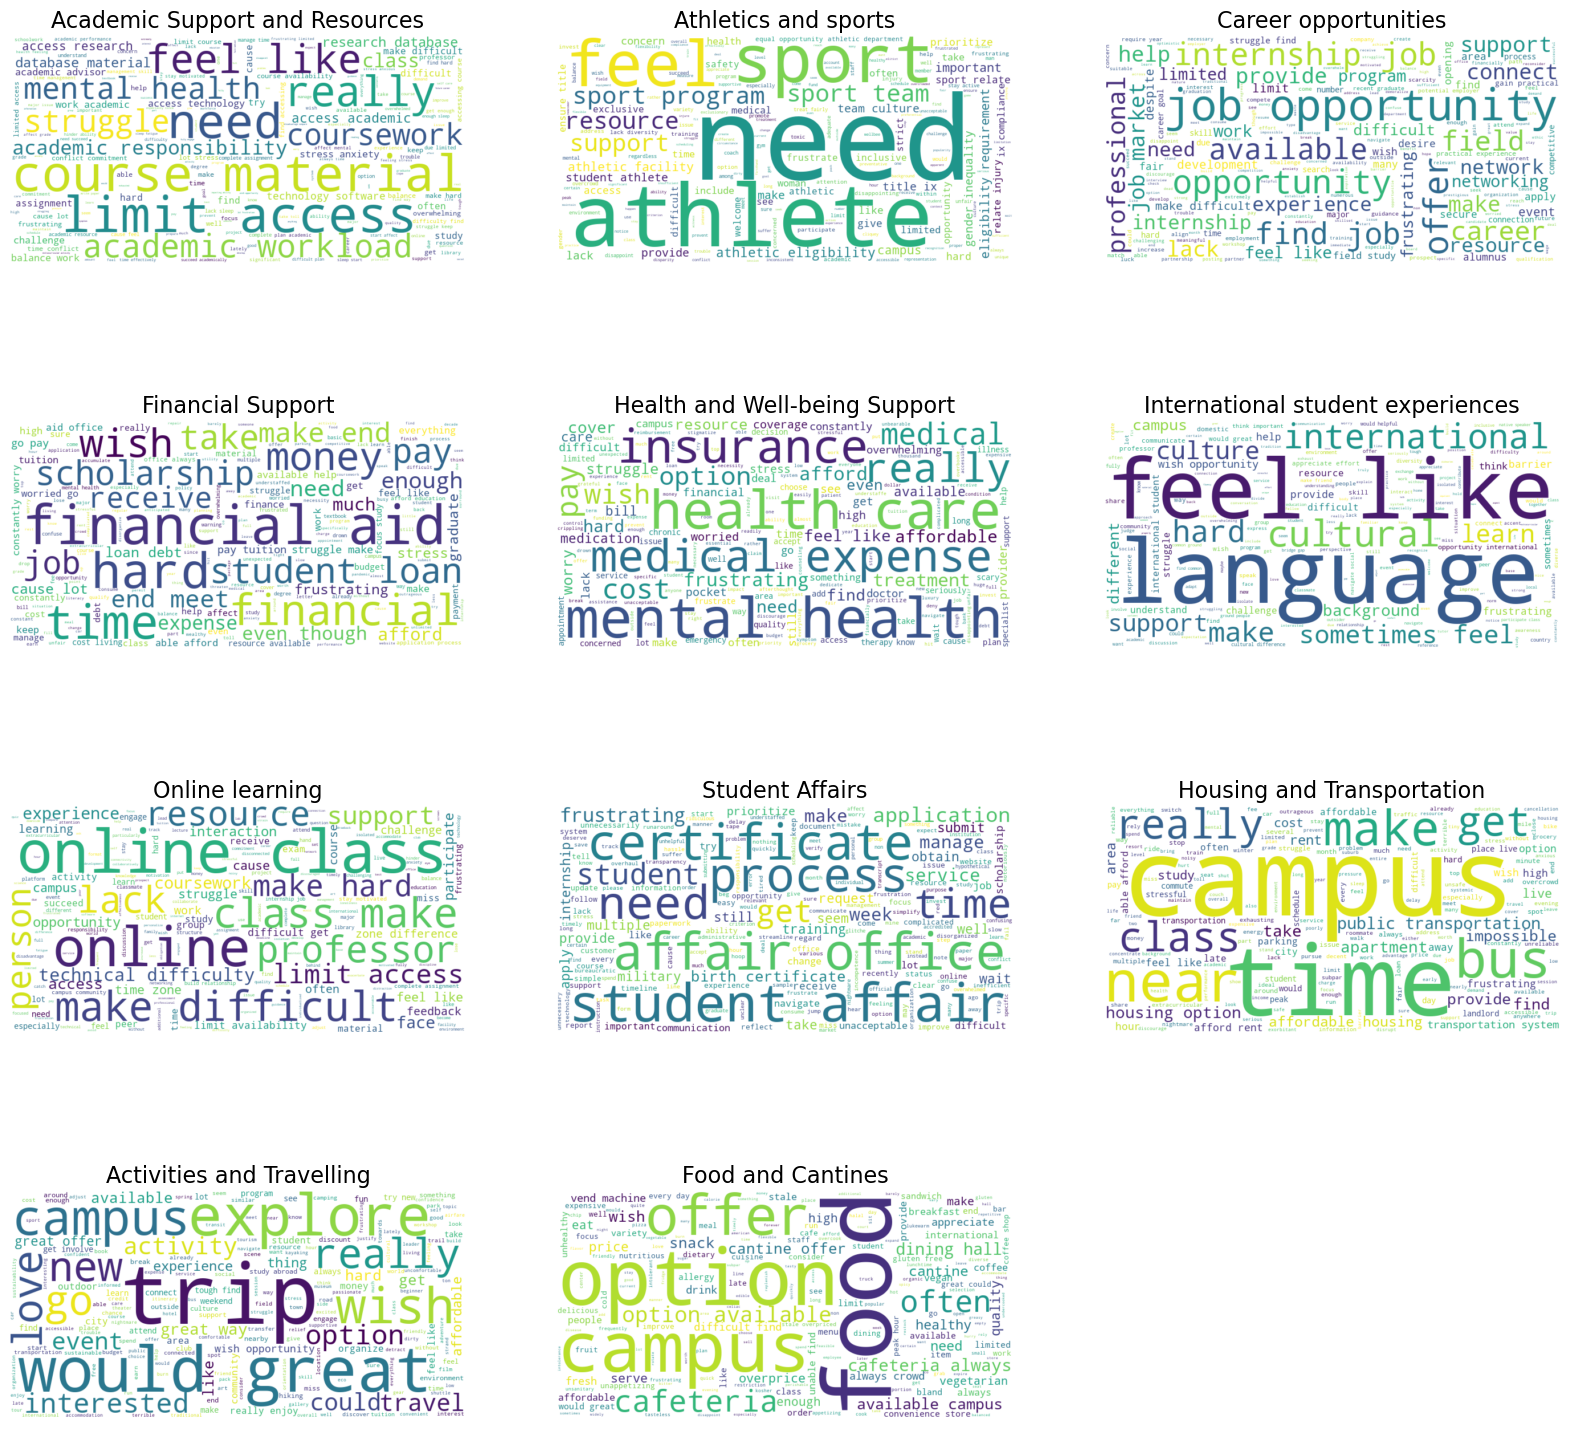

In [27]:
# Generating Word Clouds for Complaint Categeories After Data Preprocessing to show the frequent words in each category
grid = gridspec.GridSpec(4, 3)
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0) 

for n, cat in enumerate(df['Genre'].unique()):
    ax = plt.subplot(grid[n])

    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop_english,
        width=800,
        height=400
    ).generate(df[df['Genre'] == cat]['normalized_complaint'].str.cat(sep=' '))
    
    plt.title(cat, fontdict={'fontsize': 16})
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
plt.show()

# Preparing for feature extraction and modeling

In [28]:
# Extraccting the Genre and the cleaned complaint report from the dataset
comp_df = df[['Reports', 'Genre', 'normalized_complaint']].copy()

#Using pandas factorize() function to encode Genre (complaint category labels) into numerical target variables
comp_df['class_id'] = comp_df['Genre'].factorize()[0]

# Creating a dictionary for Genre/labels
label_df = comp_df[['Genre', 'class_id']].drop_duplicates()
genre_to_id = dict(label_df.values)
id_to_genre = dict(label_df[['class_id', 'Genre']].values)
id_to_genre

{0: 'Academic Support and Resources',
 1: 'Athletics and sports',
 2: 'Career opportunities',
 3: 'Financial Support',
 4: 'Health and Well-being Support',
 5: 'International student experiences',
 6: 'Online learning',
 7: 'Student Affairs',
 8: 'Housing and Transportation',
 9: 'Activities and Travelling',
 10: 'Food and Cantines'}

The target variable 'Genre' (complaint category) has been changed to numerical values above (0-10).

In [29]:
comp_df

Reports  \
0     The limited access to research databases and m...   
1     I'm having trouble finding the course material...   
2     It's frustrating to have limited access to res...   
3     I'm really struggling in one of my classes but...   
4      I am really struggling with understanding the...   
...                                                 ...   
1000  26. I have been unable to find food that meets...   
1001  27. I have been unable to find food that I can...   
1002  28. I have been unable to find food that I enjoy.   
1003  29. I have been unable to find food that is he...   
1004  30. I have been unable to find food that is co...   

                               Genre  \
0     Academic Support and Resources   
1     Academic Support and Resources   
2     Academic Support and Resources   
3     Academic Support and Resources   
4     Academic Support and Resources   
...                              ...   
1000               Food and Cantines   
1001               Food and Cantines   
1002               Food and Cantines   
1003               Food and Cantines   
1004               Food and Cantines   

                                   normalized_complaint  class_id  
0     limit access research database material cause ...         0  
1     trouble find course material need class librar...         0  
2     frustrating limited access research database m...         0  
3     really struggle one class get appointment acad...         0  
4     really struggle understand instruction assignm...         0  
...                                                 ...       ...  
1000                 unable find food meet dietary need        10  
1001                            unable find food afford        10  
1002                             unable find food enjoy        10  
1003                unable find food healthy nutritious        10  
1004                         unable find food cook like        10  

[1005 rows x 4 columns]

# 5. Training and Test Splitting Strategy

In [30]:
# Splitting the dataset into train and test set before commencing feature extraction and modelling to prevent data leakage.
from sklearn.model_selection import train_test_split
X, y = comp_df['normalized_complaint'], comp_df['class_id']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

5:1 ratio was used to divide the teaining and test set. 

In [31]:
comp_data_train = pd.concat([X_train, y_train], axis = 1)
comp_data_test = pd.concat([X_test, y_test], axis = 1)
print(len(comp_data_train))
print(len(comp_data_test))

804
201


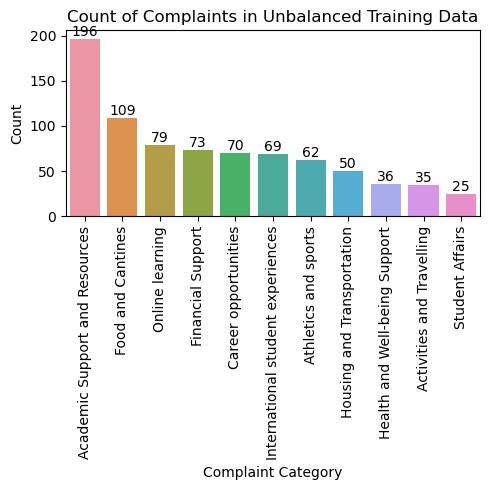

In [32]:
# To check the imbalance in the training dataset 
value_counts = comp_data_train['class_id'].value_counts()
training_count = pd.DataFrame({'class_id': value_counts.index, 'count': value_counts.values})
training_count = training_count.sort_values('count', ascending=False)
training_count.columns = ['class_id', 'count']

#mapping class_id to genre
training_count['category'] = training_count['class_id'].map(id_to_genre)

plt.figure(figsize=(5, 5)) 
ax = sns.barplot(x='category', y='count', data=training_count)
plt.xlabel('Genre'), plt.ylabel('Count'), plt.title('Count of Complaints in Unbalanced Training Data')
plt.xlabel('Complaint Category')
for i in ax.containers:
    ax.bar_label(i,)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Above barplot distribution shows the data imbalance in the training set

# 6.  Feature Extraction phase - imbalanced data

## 6.1. Bag of Words (BOW) method

### 6.1.1  BoW with N-gram (1,1)

In [33]:
# Features and labels split
X_train_norm, y_trainn = comp_data_train['normalized_complaint'].tolist(), comp_data_train['class_id'].tolist()
X_test_norm, y_testn = comp_data_test['normalized_complaint'].tolist(), comp_data_test['class_id'].tolist()

# Transforming each complaint in the X_train and X_test into a vector using only unigrams score.
count_vectorizer = CountVectorizer(ngram_range = (1, 1))
X_train_bog = count_vectorizer.fit_transform(X_train_norm)
X_test_bog = count_vectorizer.transform(X_test_norm)

# Getting the feature names
feature_names = count_vectorizer.get_feature_names_out()
# Getting the feature weights
feature_weights = X_train_bog.toarray()
# Creating a DataFrame with the feature names and weights
features_df = pd.DataFrame(feature_weights, columns=feature_names)
features_df[:5]

ability  able  abroad  academic  academically  accent  accept  access  \
0        0     0       0         0             0       0       0       0   
1        0     0       0         0             0       0       0       0   
2        0     0       0         0             0       0       0       0   
3        0     0       0         0             0       0       0       0   
4        0     0       0         0             0       0       0       0   

   accessible  accessing  ...  worry  worth  would  write  writer  writing  \
0           0          0  ...      0      0      0      0       0        0   
1           0          0  ...      0      0      0      0       0        0   
2           0          0  ...      0      0      0      0       0        0   
3           0          0  ...      0      0      0      0       0        0   
4           0          0  ...      0      0      0      0       0        0   

   wrong  year  yet  zone  
0      0     0    0     0  
1      0     0    0     0  
2      0     0    0     0  
3      0     0    0     0  
4      0     0    0     0  

[5 rows x 1294 columns]

### 6.1.2  BoW with N-gram (1,2) - Both unigram and bigram considered

In [34]:
# transform each complaint in the X_train and X_test into a vector using both unigram and bigram scores
count_vectorizer_0 = CountVectorizer(ngram_range = (1, 2))
X_train_bog_0 = count_vectorizer_0.fit_transform(X_train_norm)
X_test_bog_0 = count_vectorizer_0.transform(X_test_norm)

feature_names = count_vectorizer_0.get_feature_names_out()
feature_weights = X_train_bog_0.toarray()
features_df = pd.DataFrame(feature_weights, columns=feature_names)
features_df[:5]

ability  ability background  ability complete  ability concentrate  \
0        0                   0                 0                    0   
1        0                   0                 0                    0   
2        0                   0                 0                    0   
3        0                   0                 0                    0   
4        0                   0                 0                    0   

   ability conduct  ability coursework  ability focus  ability graduate  \
0                0                   0              0                 0   
1                0                   0              0                 0   
2                0                   0              0                 0   
3                0                   0              0                 0   
4                0                   0              0                 0   

   ability keep  ability pay  ...  wrong improve  year  year cost  \
0             0            0  ...              0     0          0   
1             0            0  ...              0     0          0   
2             0            0  ...              0     0          0   
3             0            0  ...              0     0          0   
4             0            0  ...              0     0          0   

   year experience  year find  year pay  yet  zone  zone difference  \
0                0          0         0    0     0                0   
1                0          0         0    0     0                0   
2                0          0         0    0     0                0   
3                0          0         0    0     0                0   
4                0          0         0    0     0                0   

   zone online  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 6206 columns]

In [35]:
Counter(y_trainn)

Counter({0: 196,
         1: 62,
         4: 36,
         6: 79,
         10: 109,
         7: 25,
         3: 73,
         5: 69,
         8: 50,
         2: 70,
         9: 35})

Imbalance in the training set also shown above

## 6.2. TF-IDF method

### 6.2.1 TF-IDF method N-gram (1,1)

In [36]:
# Transform each complaint in the X_train and X_test into a vector using only unigrams score.
TfidfVec = TfidfVectorizer(ngram_range = (1, 1))
X_train_tfidf = TfidfVec.fit_transform(X_train_norm)
X_test_tfidf = TfidfVec.transform(X_test_norm)

feature_names = TfidfVec.get_feature_names_out()
feature_weights = X_train_tfidf.toarray()
features_df = pd.DataFrame(feature_weights, columns=feature_names)
features_df[:5]

ability  able  abroad  academic  academically  accent  accept  access  \
0      0.0   0.0     0.0       0.0           0.0     0.0     0.0     0.0   
1      0.0   0.0     0.0       0.0           0.0     0.0     0.0     0.0   
2      0.0   0.0     0.0       0.0           0.0     0.0     0.0     0.0   
3      0.0   0.0     0.0       0.0           0.0     0.0     0.0     0.0   
4      0.0   0.0     0.0       0.0           0.0     0.0     0.0     0.0   

   accessible  accessing  ...  worry  worth  would  write  writer  writing  \
0         0.0        0.0  ...    0.0    0.0    0.0    0.0     0.0      0.0   
1         0.0        0.0  ...    0.0    0.0    0.0    0.0     0.0      0.0   
2         0.0        0.0  ...    0.0    0.0    0.0    0.0     0.0      0.0   
3         0.0        0.0  ...    0.0    0.0    0.0    0.0     0.0      0.0   
4         0.0        0.0  ...    0.0    0.0    0.0    0.0     0.0      0.0   

   wrong  year  yet  zone  
0    0.0   0.0  0.0   0.0  
1    0.0   0.0  0.0   0.0  
2    0.0   0.0  0.0   0.0  
3    0.0   0.0  0.0   0.0  
4    0.0   0.0  0.0   0.0  

[5 rows x 1294 columns]

### 6.2.1 TF-IDF method N-gram (1,2) - Both unigram and bigram considered

In [37]:
# transform each complaint in the X_train and X_test into a vector using both unigram and bigram scores
TfidfVec_0 = TfidfVectorizer(ngram_range = (1, 2))
X_train_tfidf_0 = TfidfVec_0.fit_transform(X_train_norm)
X_test_tfidf_0 = TfidfVec_0.transform(X_test_norm)

feature_names = TfidfVec_0.get_feature_names_out()
feature_weights = X_train_tfidf_0.toarray()
features_df = pd.DataFrame(feature_weights, columns=feature_names)
features_df[:5]

ability  ability background  ability complete  ability concentrate  \
0      0.0                 0.0               0.0                  0.0   
1      0.0                 0.0               0.0                  0.0   
2      0.0                 0.0               0.0                  0.0   
3      0.0                 0.0               0.0                  0.0   
4      0.0                 0.0               0.0                  0.0   

   ability conduct  ability coursework  ability focus  ability graduate  \
0              0.0                 0.0            0.0               0.0   
1              0.0                 0.0            0.0               0.0   
2              0.0                 0.0            0.0               0.0   
3              0.0                 0.0            0.0               0.0   
4              0.0                 0.0            0.0               0.0   

   ability keep  ability pay  ...  wrong improve  year  year cost  \
0           0.0          0.0  ...            0.0   0.0        0.0   
1           0.0          0.0  ...            0.0   0.0        0.0   
2           0.0          0.0  ...            0.0   0.0        0.0   
3           0.0          0.0  ...            0.0   0.0        0.0   
4           0.0          0.0  ...            0.0   0.0        0.0   

   year experience  year find  year pay  yet  zone  zone difference  \
0              0.0        0.0       0.0  0.0   0.0              0.0   
1              0.0        0.0       0.0  0.0   0.0              0.0   
2              0.0        0.0       0.0  0.0   0.0              0.0   
3              0.0        0.0       0.0  0.0   0.0              0.0   
4              0.0        0.0       0.0  0.0   0.0              0.0   

   zone online  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  

[5 rows x 6206 columns]

## 6.3. Word2Vec (word embedding) method

   ### 6.3.1.  Training_Test_Split with partially preprocessed complaint report
    - Only lower-casing applied

In [38]:
# Extracting the Genre, Reprot and class_id from the main database
df_vec = comp_df[['Reports', 'class_id']].copy()

# Feature-target selection
Xv, yv = df_vec.drop('class_id', axis = 1), df_vec['class_id']

X_trainv, X_testv, y_trainv, y_testv = train_test_split(Xv, yv, test_size = 0.2, random_state = 40)
data_trainv = pd.concat([X_trainv, y_trainv], axis = 1)
data_testv = pd.concat([X_testv, y_testv], axis = 1)

# Partial text preprocessing for Word2Vec
for dfv in [data_trainv, data_testv]:
    dfv['tokens'] = (dfv["Reports"].apply(complaint_lowercasing).apply(word_tokenize))

data_trainv[['tokens', 'class_id']][:3]

tokens  class_id
656  [online, students, often, feel, isolated, and,...         6
721  [it, 's, frustrating, to, have, to, rely, on, ...         6
928  [4, ., ``, the, food, on, campus, is, great, ,...        10

   ### 6.3.2.  Training_Test_Split with fully preprocessed complaint report

In [39]:
# word2vec with fully normalized complaint
df_vecfull = comp_df[['normalized_complaint', 'class_id']].copy()

# Feature-target selection
Xf, yf = df_vecfull.drop('class_id', axis = 1), df_vecfull['class_id']

# Train-test split (from complete data)
X_trainf, X_testf, y_trainf, y_testf = train_test_split(Xf, yf, test_size = 0.2, random_state = 40)
data_trainf = pd.concat([X_trainf, y_trainf], axis = 1)
data_testf = pd.concat([X_testf, y_testf], axis = 1)

for dff in [data_trainf, data_testf]:
    dff['tokens'] = (dff["normalized_complaint"].apply(word_tokenize))

data_trainf[['tokens', 'class_id']][:3]

tokens  class_id
656  [online, often, feel, isolated, disconnected, ...         6
721  [frustrating, rely, technology, education, esp...         6
928  [food, campus, great, cantine, always, crowd, ...        10

### 6.3.3.  Word embedding

In [40]:
# Loading the pre-trained Word2Vec model
import gensim
word2vec_path = r'C:/Users/Cloud/GoogleNews-vectors-negative300.bin'
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary = True)

In [41]:
# Functions for Word2Vec
def average_word2vec_get(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list) < 1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def word2vec_embeddings_get(vectors, tokens, generate_missing = False):
    embeddings = tokens.apply(lambda x: average_word2vec_get(x, vectors, generate_missing = generate_missing))
    return list(embeddings)


# Word2Vec embedding - partial pre-processing (only lowercasing)
X_train_embedv = word2vec_embeddings_get(word2vec, data_trainv['tokens'])
X_test_embedv = word2vec_embeddings_get(word2vec, data_testv['tokens'])
# Converting to Compressed Sparse Row matrix
X_train_w2v = scipy.sparse.csr_matrix(X_train_embedv)
X_test_w2v = scipy.sparse.csr_matrix(X_test_embedv)

# Word2Vec embedding - fully preprocessing
X_train_embedf = word2vec_embeddings_get(word2vec, data_trainf['tokens'])
X_test_embedf = word2vec_embeddings_get(word2vec, data_testf['tokens'])
# Converting to Compressed Sparse Row matrix
X_train_w2f = scipy.sparse.csr_matrix(X_train_embedf)
X_test_w2f = scipy.sparse.csr_matrix(X_test_embedf)

# 7. Feature extraction -  Balance data (with RandomOversampler)

## 7.1. Bag of Words (BOW) method

### 7.1.1.  BoW with N-gram (1,1)

In [42]:
# Setting the random sampling strategy to upscale all the category to the count of the class with highest record
ROS = RandomOverSampler(sampling_strategy={0:196, 1:196, 2:196, 3:196, 4:196, 5:196, 6:196, 7:196, 8:196, 9:196, 10:196})

# BoW vectorization with N-gram (1,1) and balancing with random oversampling

# BoW vectorization
count_vectorizer1 = CountVectorizer(ngram_range = (1, 1))
X_train_bogros1 = count_vectorizer1.fit_transform(X_train_norm)
X_test_bogros = count_vectorizer1.transform(X_test_norm)

#Data balancing
X_train_bogros, y_train_bogros = ROS.fit_resample(X_train_bogros1, y_trainn)

Counter(y_train_bogros)

Counter({0: 196,
         1: 196,
         4: 196,
         6: 196,
         10: 196,
         7: 196,
         3: 196,
         5: 196,
         8: 196,
         2: 196,
         9: 196})

Imbalance in the training set corrected with Random Oversampling technique as show in the count above and plot below

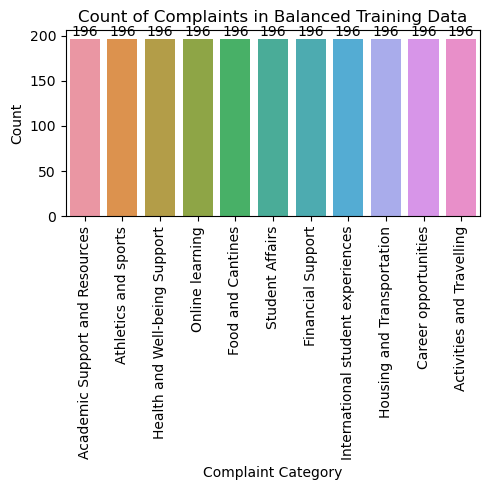

In [43]:
# Plot to show the balancing of the training dataset

counter_data = Counter(y_train_bogros)
df_bal = pd.DataFrame.from_dict(counter_data, orient='index', columns=['count'])
df_bal['category'] = df_bal.index.map(id_to_genre)

plt.figure(figsize=(5, 5))
ax = sns.barplot(x='category', y='count', data=df_bal)
plt.xlabel('Genre'), plt.ylabel('Count'), plt.title('Count of Complaints in Balanced Training Data')
plt.xlabel('Complaint Category')
for i in ax.containers:
    ax.bar_label(i,)

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### 7.1.2  BoW with N-gram (1,2) - Both unigram and bigram considered

In [44]:
# BoW vectorization with N-gram (1,2) and balancing with random oversampling
count_vectorizer_0R = CountVectorizer(ngram_range = (1, 2))
X_train_bog_0R = count_vectorizer_0R.fit_transform(X_train_norm)
X_test_bogros_0 = count_vectorizer_0R.transform(X_test_norm)

X_train_bogros_0, y_train_bogros_0 = ROS.fit_resample(X_train_bog_0R, y_trainn)

Counter(y_train_bogros_0)

Counter({0: 196,
         1: 196,
         4: 196,
         6: 196,
         10: 196,
         7: 196,
         3: 196,
         5: 196,
         8: 196,
         2: 196,
         9: 196})

In [45]:
feature_names = count_vectorizer_0.get_feature_names_out()
feature_weights = X_train_bog_0.toarray()
features_df = pd.DataFrame(feature_weights, columns=feature_names)
features_df[:5]

ability  ability background  ability complete  ability concentrate  \
0        0                   0                 0                    0   
1        0                   0                 0                    0   
2        0                   0                 0                    0   
3        0                   0                 0                    0   
4        0                   0                 0                    0   

   ability conduct  ability coursework  ability focus  ability graduate  \
0                0                   0              0                 0   
1                0                   0              0                 0   
2                0                   0              0                 0   
3                0                   0              0                 0   
4                0                   0              0                 0   

   ability keep  ability pay  ...  wrong improve  year  year cost  \
0             0            0  ...              0     0          0   
1             0            0  ...              0     0          0   
2             0            0  ...              0     0          0   
3             0            0  ...              0     0          0   
4             0            0  ...              0     0          0   

   year experience  year find  year pay  yet  zone  zone difference  \
0                0          0         0    0     0                0   
1                0          0         0    0     0                0   
2                0          0         0    0     0                0   
3                0          0         0    0     0                0   
4                0          0         0    0     0                0   

   zone online  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 6206 columns]

## 7.2. TF-IDF method

### 7.2.1  TF-IDF with N-gram (1,1)

In [46]:
# TF-IDF vectorization with N-gram (1,1) and balancing with random oversampling

vectorizer1 = TfidfVectorizer(ngram_range = (1, 1))
# X_test TF-IDF vectorization
X_train_tfidfros1 = vectorizer1.fit_transform(X_train_norm)
# X_test TF-IDF vectorization
X_test_tfidfros = vectorizer1.transform(X_test_norm)

X_train_tfidfros, y_train_tfidfros = ROS.fit_resample(X_train_tfidfros1, y_trainn)
Counter(y_train_tfidfros)

Counter({0: 196,
         1: 196,
         4: 196,
         6: 196,
         10: 196,
         7: 196,
         3: 196,
         5: 196,
         8: 196,
         2: 196,
         9: 196})

### 7.2.2  TF-IDF with N-gram (1,2) - Both unigram and bigram considered

In [47]:
# TF-IDF vectorization with N-gram (1,2) and balancing with random oversampling
vectorizer1_0 = TfidfVectorizer(ngram_range = (1, 2))
X_train_tfidfros1_0 = vectorizer1_0.fit_transform(X_train_norm)
X_test_tfidfros_0 = vectorizer1_0.transform(X_test_norm)

X_train_tfidfros_0, y_train_tfidfros_0 = ROS.fit_resample(X_train_tfidfros1_0, y_trainn)
Counter(y_train_tfidfros_0)


Counter({0: 196,
         1: 196,
         4: 196,
         6: 196,
         10: 196,
         7: 196,
         3: 196,
         5: 196,
         8: 196,
         2: 196,
         9: 196})

## 7.3. Word2Vec method

### 7.3.1. With Partially Pre-processing Training Data

In [48]:
# Word2Vec with partially proprecessed balanced training data
ROS_v = RandomOverSampler(sampling_strategy={0:192, 1:192, 2:192, 3:192, 4:192, 5:192, 6:192, 7:192, 8:192, 9:192, 10:192})
X_train_w2vros, y_train_vros = ROS_v.fit_resample(X_train_w2v, y_trainv)
Counter(y_train_vros)

Counter({6: 192,
         10: 192,
         9: 192,
         0: 192,
         4: 192,
         8: 192,
         7: 192,
         2: 192,
         5: 192,
         3: 192,
         1: 192})

### 7.3.2. With Fully Pre-processing Training Data

In [49]:
# Word2Vec using fully preprocessed balanced training data
X_train_w2vros_0, y_train_vros_0 = ROS_v.fit_resample(X_train_w2f, y_trainv)
Counter(y_train_vros_0)

Counter({6: 192,
         10: 192,
         9: 192,
         0: 192,
         4: 192,
         8: 192,
         7: 192,
         2: 192,
         5: 192,
         3: 192,
         1: 192})

# 8. Classifier Model Training and Testing, and Evaluation

## 8.1 Defining function for the model training and testing

In [50]:
# Putting the models in a dictionary
models = {"KNN Classifier" : KNeighborsClassifier(),
          "Linear SVC" : LinearSVC(), 
          "Random Forest":RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
         "XGBoost" : XGBClassifier(),
         "Decision Tree": DecisionTreeClassifier()}

def fit_and_score2(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    X_train : training data
    X_test : testing data
    y_train : labels associated with training data
    y_test : labels associated with test data
    """
    # reproducible results with random seed
    np.random.seed(42)
    # A dictionary to store evaluation metrics
    metrics = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1 Score": []}
    # Loop through models
    for name, model in models.items():
        # Model fiiting to the data
        model.fit(X_train, y_train)
        # Make predictions on test data
        y_pred = model.predict(X_test)
        # Evaluation metrics calculation
        metrics["Model"].append(name)
        metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
        metrics["Precision"].append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
        metrics["Recall"].append(recall_score(y_test, y_pred, average='weighted', zero_division=0))
        metrics["F1 Score"].append(f1_score(y_test, y_pred, average='weighted', zero_division=0))
    return pd.DataFrame(metrics)

## 8.2 Modelling for imbalanced data and evaluation

Six experimental models will be built with the imbalance data using the 6 classifier models
- 1. N-gram (1,1) will be used with BoW to build the models
- 2. N-gram (1,1) will be used with TF-IDF to build the models
- 3. N-gram (1,2) will be used with BoW to build the models
- 4. N-gram (1,2) will be used with TF-IDF to build the models
- 5. Partially preprocessed data will be used with Word2Vec to build the models
- 6. Fully preprocessed data will be used with Word2Vec to build the models

In [51]:
#N-GRAM 1,1 with imbalanced data
#==========================================================
# Classifier models using BoW method Ngram(1,1)
bow11_result = fit_and_score2(models=models,
                             X_train=X_train_bog,
                             X_test=X_test_bog,
                             y_train=y_trainn,
                             y_test=y_testn)
print("Evaluation Metrics Result using with BoW n-gram (1,1) on imbalanced data \n")
print(bow11_result)
print('*' * 60 ,'\n')

# Classifier models using TF-IDF method Ngram (1,1)
tfidf11_result = fit_and_score2(models=models,
                             X_train=X_train_tfidf,
                             X_test=X_test_tfidf,
                             y_train=y_trainn,
                             y_test=y_testn)
print("Evaluation Metrics Result using with TF-IDF n-gram (1,1) on imbalanced data \n")
print(tfidf11_result)
print('*' * 60 ,'\n')
#==========================================================

#N-GRAM 1,2 with imbalanced data
#==========================================================
# Classifier models using BoW method Ngram(1,2)
bow12_result = fit_and_score2(models=models,
                             X_train=X_train_bog_0,
                             X_test=X_test_bog_0,
                             y_train=y_trainn,
                             y_test=y_testn)
print("Evaluation Metrics Result using with BoW n-gram (1,2) on imbalanced data \n")
print(bow12_result)
print('*' * 60 ,'\n')

# Classifier models using TF-IDF method Ngram (1,2)
tfidf12_result = fit_and_score2(models=models,
                             X_train=X_train_tfidf_0,
                             X_test=X_test_tfidf_0,
                             y_train=y_trainn,
                             y_test=y_testn)
print("Evaluation Metrics Result using with TF-IDF n-gram (1,2) on imbalanced data \n")
print(tfidf12_result)
print('*' * 60 ,'\n')
#==========================================================

#Word2Vec with imbalanced data
#==========================================================
# Result for Classifier models using Word2Vec with partially preprocessed data.
W2v_partial_result = fit_and_score2(models=models,
                             X_train=X_train_w2v,
                             X_test=X_test_w2v,
                             y_train=y_trainv,
                             y_test=y_testv)
print("Evaluation Metrics Result using with Word2Vec with partially preprocessed data on imbalanced data \n")
print(W2v_partial_result)
print('*' * 60 ,'\n')

# Result for Classifier models using Word2Vec method - fully preprocessed training data
W2v_fully_result = fit_and_score2(models=models,
                             X_train=X_train_w2f,
                             X_test=X_test_w2f,
                             y_train=y_trainf,
                             y_test=y_testf)
print("Evaluation Metrics Result using with Word2Vec with fully preprocessed data on imbalanced data \n")
print(W2v_fully_result)
print('*' * 60 ,'\n')
#==========================================================

Evaluation Metrics Result using with BoW n-gram (1,1) on imbalanced data 

            Model  Accuracy  Precision    Recall  F1 Score
0  KNN Classifier  0.681592   0.794433  0.681592  0.690397
1      Linear SVC  0.925373   0.930289  0.925373  0.925546
2   Random Forest  0.800995   0.860358  0.800995  0.791374
3         XGBoost  0.930348   0.934647  0.930348  0.929318
4   Decision Tree  0.865672   0.894842  0.865672  0.873599
************************************************************ 

Evaluation Metrics Result using with TF-IDF n-gram (1,1) on imbalanced data 

            Model  Accuracy  Precision    Recall  F1 Score
0  KNN Classifier  0.905473   0.916130  0.905473  0.905663
1      Linear SVC  0.940299   0.942017  0.940299  0.939845
2   Random Forest  0.786070   0.843375  0.786070  0.776019
3         XGBoost  0.925373   0.931628  0.925373  0.923998
4   Decision Tree  0.855721   0.874636  0.855721  0.855909
************************************************************ 

Evaluation Me

In [52]:
#Putting all the metric results for all the classifiers and the scenarios with imbalance data together in a dataframe
all_results = pd.DataFrame(columns=["Scenario", "Model", "Accuracy", "Precision", "Recall", "F1 Score"])
all_results = pd.concat([all_results, bow11_result.assign(Scenario="BoW Ngram (1,1) - Imbalanced Data")])
all_results = pd.concat([all_results, tfidf11_result.assign(Scenario="TF-IDF Ngram (1,1) - Imbalanced Data")])
all_results = pd.concat([all_results, bow12_result.assign(Scenario="BoW Ngram (1,2) - Imbalanced Data")])
all_results = pd.concat([all_results, tfidf12_result.assign(Scenario="TF-IDF Ngram (1,2) - Imbalanced Data")])
all_results = pd.concat([all_results, W2v_partial_result.assign(Scenario="Word2Vec - Partially Preprocessed Data")])
all_results = pd.concat([all_results, W2v_fully_result.assign(Scenario="Word2Vec - Fully Preprocessed Data")])
all_results.reset_index(drop=True, inplace=True)
# Save the DataFrame to an Excel file
all_results.to_excel("imbalanced_metrics_results.xlsx", index=False)
all_results

Scenario           Model  Accuracy  \
0        BoW Ngram (1,1) - Imbalanced Data  KNN Classifier  0.681592   
1        BoW Ngram (1,1) - Imbalanced Data      Linear SVC  0.925373   
2        BoW Ngram (1,1) - Imbalanced Data   Random Forest  0.800995   
3        BoW Ngram (1,1) - Imbalanced Data         XGBoost  0.930348   
4        BoW Ngram (1,1) - Imbalanced Data   Decision Tree  0.865672   
5     TF-IDF Ngram (1,1) - Imbalanced Data  KNN Classifier  0.905473   
6     TF-IDF Ngram (1,1) - Imbalanced Data      Linear SVC  0.940299   
7     TF-IDF Ngram (1,1) - Imbalanced Data   Random Forest  0.786070   
8     TF-IDF Ngram (1,1) - Imbalanced Data         XGBoost  0.925373   
9     TF-IDF Ngram (1,1) - Imbalanced Data   Decision Tree  0.855721   
10       BoW Ngram (1,2) - Imbalanced Data  KNN Classifier  0.422886   
11       BoW Ngram (1,2) - Imbalanced Data      Linear SVC  0.960199   
12       BoW Ngram (1,2) - Imbalanced Data   Random Forest  0.731343   
13       BoW Ngram (1,2) - Imbalanced Data         XGBoost  0.935323   
14       BoW Ngram (1,2) - Imbalanced Data   Decision Tree  0.875622   
15    TF-IDF Ngram (1,2) - Imbalanced Data  KNN Classifier  0.940299   
16    TF-IDF Ngram (1,2) - Imbalanced Data      Linear SVC  0.960199   
17    TF-IDF Ngram (1,2) - Imbalanced Data   Random Forest  0.706468   
18    TF-IDF Ngram (1,2) - Imbalanced Data         XGBoost  0.900498   
19    TF-IDF Ngram (1,2) - Imbalanced Data   Decision Tree  0.835821   
20  Word2Vec - Partially Preprocessed Data  KNN Classifier  0.830846   
21  Word2Vec - Partially Preprocessed Data      Linear SVC  0.930348   
22  Word2Vec - Partially Preprocessed Data   Random Forest  0.830846   
23  Word2Vec - Partially Preprocessed Data         XGBoost  0.895522   
24  Word2Vec - Partially Preprocessed Data   Decision Tree  0.522388   
25      Word2Vec - Fully Preprocessed Data  KNN Classifier  0.870647   
26      Word2Vec - Fully Preprocessed Data      Linear SVC  0.950249   
27      Word2Vec - Fully Preprocessed Data   Random Forest  0.830846   
28      Word2Vec - Fully Preprocessed Data         XGBoost  0.840796   
29      Word2Vec - Fully Preprocessed Data   Decision Tree  0.547264   

    Precision    Recall  F1 Score  
0    0.794433  0.681592  0.690397  
1    0.930289  0.925373  0.925546  
2    0.860358  0.800995  0.791374  
3    0.934647  0.930348  0.929318  
4    0.894842  0.865672  0.873599  
5    0.916130  0.905473  0.905663  
6    0.942017  0.940299  0.939845  
7    0.843375  0.786070  0.776019  
8    0.931628  0.925373  0.923998  
9    0.874636  0.855721  0.855909  
10   0.785170  0.422886  0.424598  
11   0.962783  0.960199  0.960031  
12   0.830011  0.731343  0.717401  
13   0.939626  0.935323  0.935690  
14   0.896091  0.875622  0.881271  
15   0.943376  0.940299  0.938997  
16   0.961727  0.960199  0.959899  
17   0.839806  0.706468  0.697421  
18   0.907874  0.900498  0.895180  
19   0.860117  0.835821  0.838908  
20   0.876201  0.830846  0.821226  
21   0.936742  0.930348  0.929108  
22   0.869024  0.830846  0.822238  
23   0.895758  0.895522  0.892765  
24   0.538546  0.522388  0.522268  
25   0.882505  0.870647  0.868949  
26   0.951980  0.950249  0.949150  
27   0.873389  0.830846  0.829165  
28   0.854627  0.840796  0.839519  
29   0.556925  0.547264  0.538568

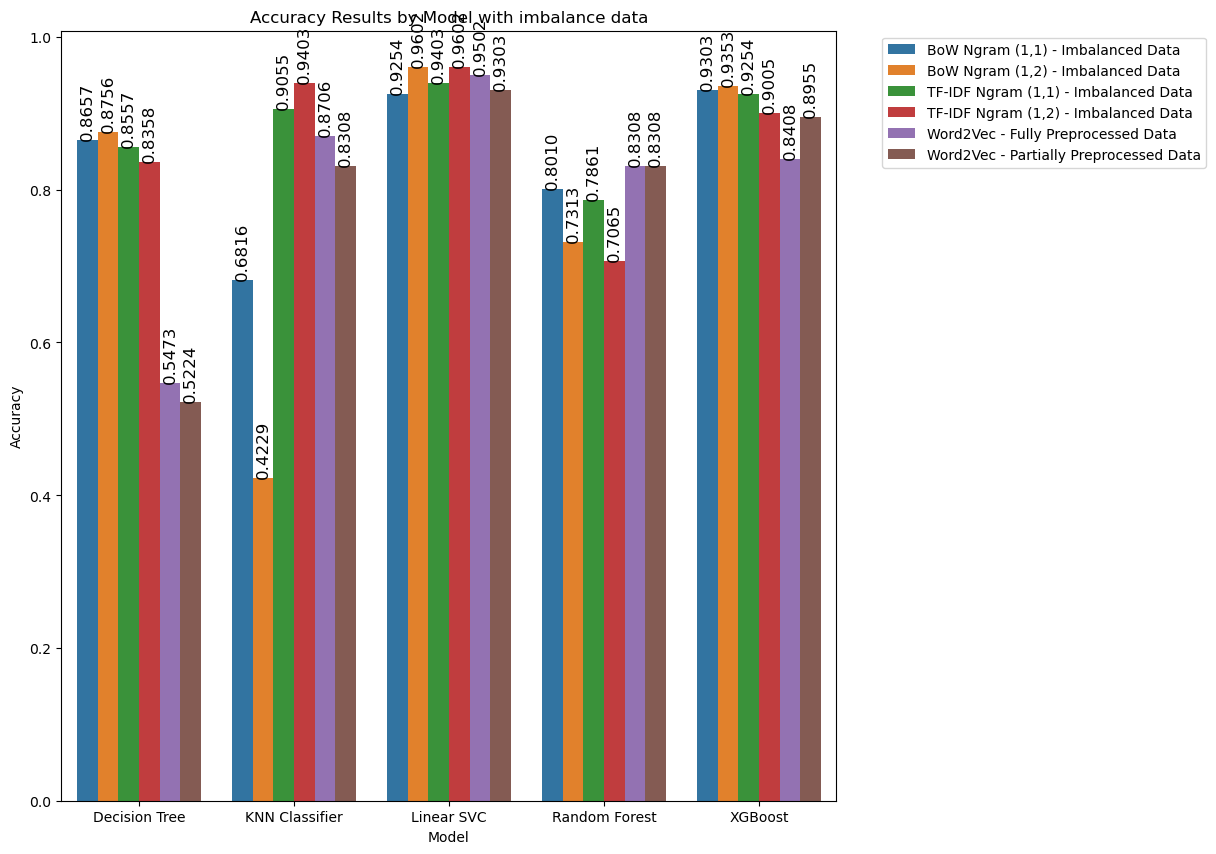

In [53]:
# PLotting the Accuracy Result
accuracy_data = all_results.groupby(['Model', 'Scenario'])['Accuracy'].mean().reset_index()
plt.figure(figsize=(10, 10))
custom_palette = ['red' 'blue', 'green', 'orange', 'purple', 'yellow']
sns.barplot(data=accuracy_data, x='Model', y='Accuracy', hue='Scenario')
plt.title('Accuracy Results by Model with imbalance data')
plt.xlabel('Model')
plt.ylabel('Accuracy')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', fontsize=12, va='bottom', rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

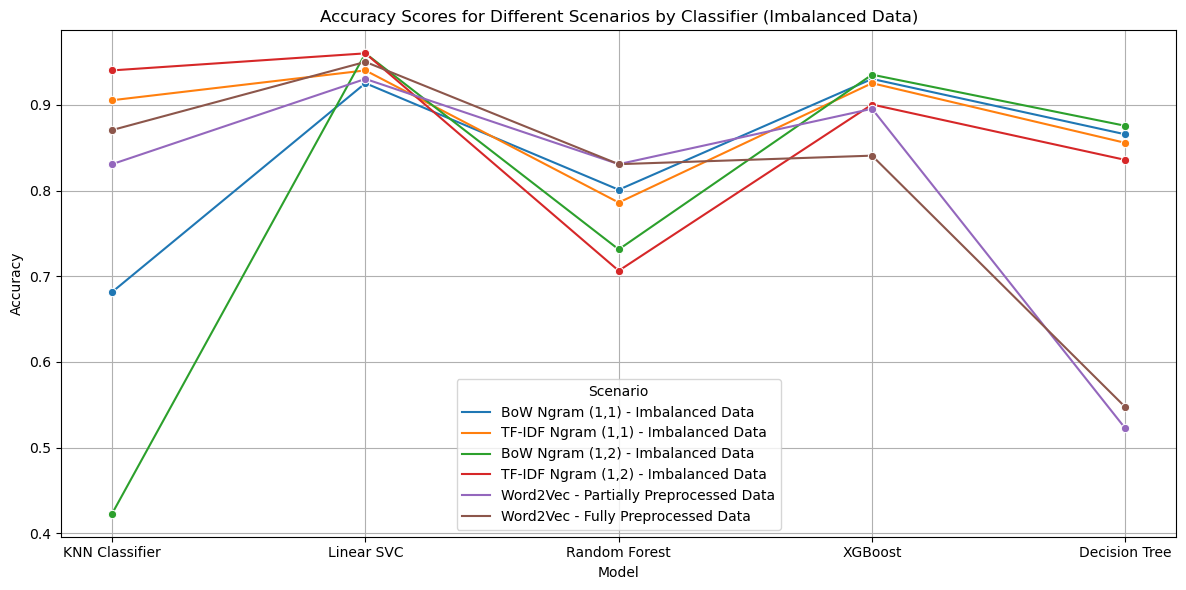

In [54]:
# Plotting the line graph for the Accuracy Result
plt.figure(figsize=(12, 6))
sns.lineplot(data=all_results, x='Model', y='Accuracy', hue='Scenario', marker='o')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Different Scenarios by Classifier (Imbalanced Data)')
plt.xticks()
plt.grid(True) 
plt.tight_layout()
plt.show()

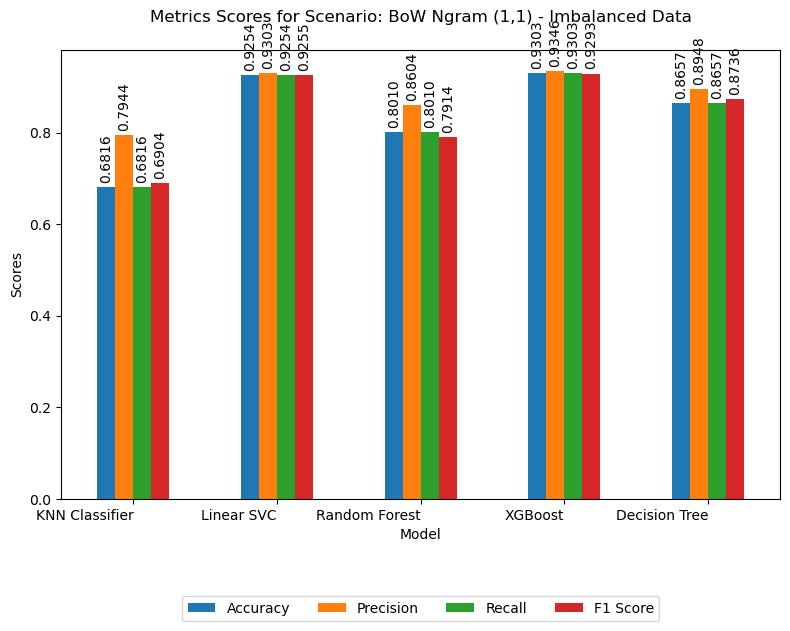

In [55]:
# Plotting barplots for 'Metrics Scores for Scenario: BoW Ngram (1,1) - Imbalanced Data'
filtered_df = all_results.loc[all_results['Scenario'] == 'BoW Ngram (1,1) - Imbalanced Data']
x_labels = filtered_df.columns[2:]
fig, ax = plt.subplots(figsize=(8, 6))
filtered_df.plot(x='Model', y=x_labels, kind='bar', ax=ax)
ax.set_title('Metrics Scores for Scenario: BoW Ngram (1,1) - Imbalanced Data', pad=20)
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
plt.xticks(rotation = 0, ha='right')
for i in ax.containers:
    ax.bar_label(i, fmt='%.4f', fontsize=10, padding=3, rotation=90)
plt.subplots_adjust(top=0.5)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=len(x_labels))
plt.tight_layout()
plt.show()

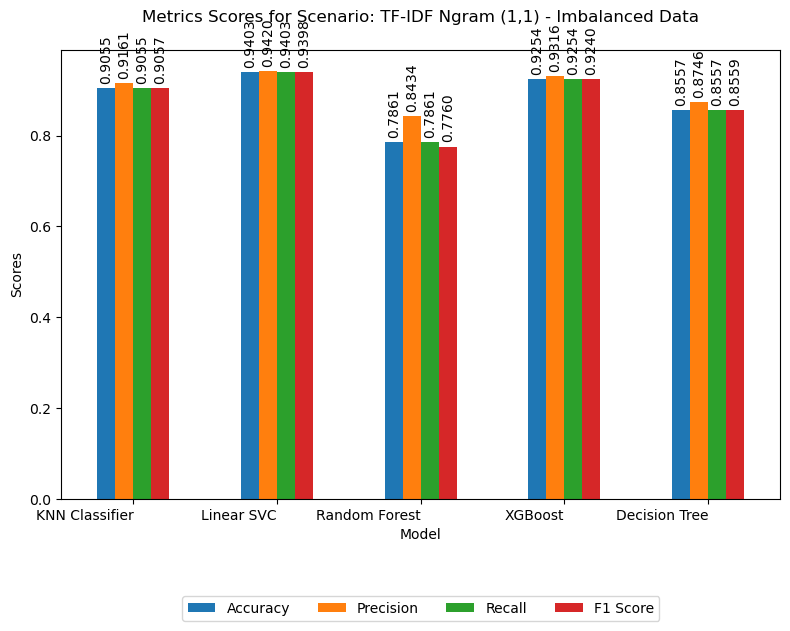

In [56]:
# Plotting barplots for 'Metrics Scores for Scenario: TF-IDF Ngram (1,1) - Imbalanced Data'
filtered_df = all_results.loc[all_results['Scenario'] == 'TF-IDF Ngram (1,1) - Imbalanced Data']
x_labels = filtered_df.columns[2:]
fig, ax = plt.subplots(figsize=(8, 6))
filtered_df.plot(x='Model', y=x_labels, kind='bar', ax=ax)
ax.set_title('Metrics Scores for Scenario: TF-IDF Ngram (1,1) - Imbalanced Data', pad=20) 
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
plt.xticks(rotation = 0, ha='right')
for i in ax.containers:
    ax.bar_label(i, fmt='%.4f', fontsize=10, padding=3, rotation=90)
plt.subplots_adjust(top=0.5)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=len(x_labels))
plt.tight_layout()
plt.show()

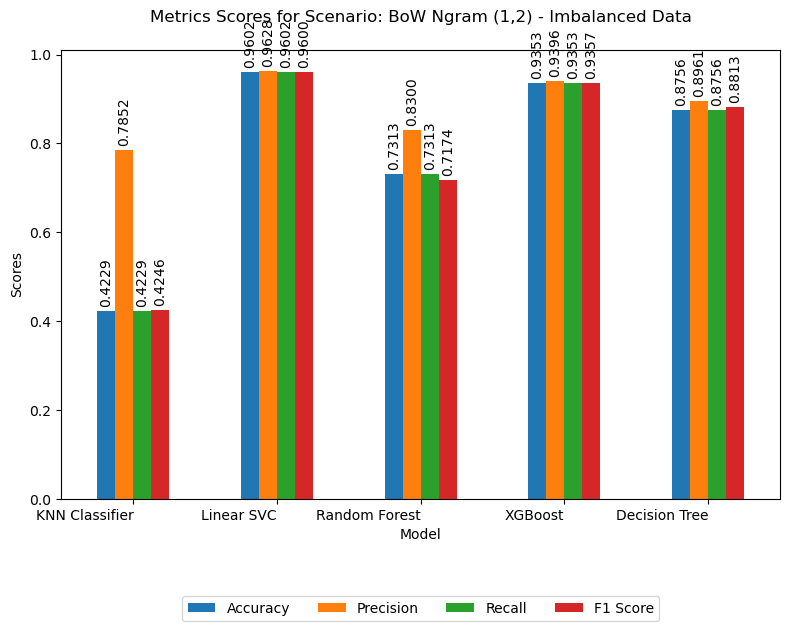

In [57]:
# Plotting barplots for 'Metrics Scores for Scenario: BoW Ngram (1,2) - Imbalanced Data'
filtered_df = all_results.loc[all_results['Scenario'] == 'BoW Ngram (1,2) - Imbalanced Data']
x_labels = filtered_df.columns[2:]
fig, ax = plt.subplots(figsize=(8, 6))
filtered_df.plot(x='Model', y=x_labels, kind='bar', ax=ax)
ax.set_title('Metrics Scores for Scenario: BoW Ngram (1,2) - Imbalanced Data', pad=20)  
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
plt.xticks(rotation = 0, ha='right')
for i in ax.containers:
    ax.bar_label(i, fmt='%.4f', fontsize=10, padding=3, rotation=90)
plt.subplots_adjust(top=0.5)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=len(x_labels))
plt.tight_layout()
plt.show()

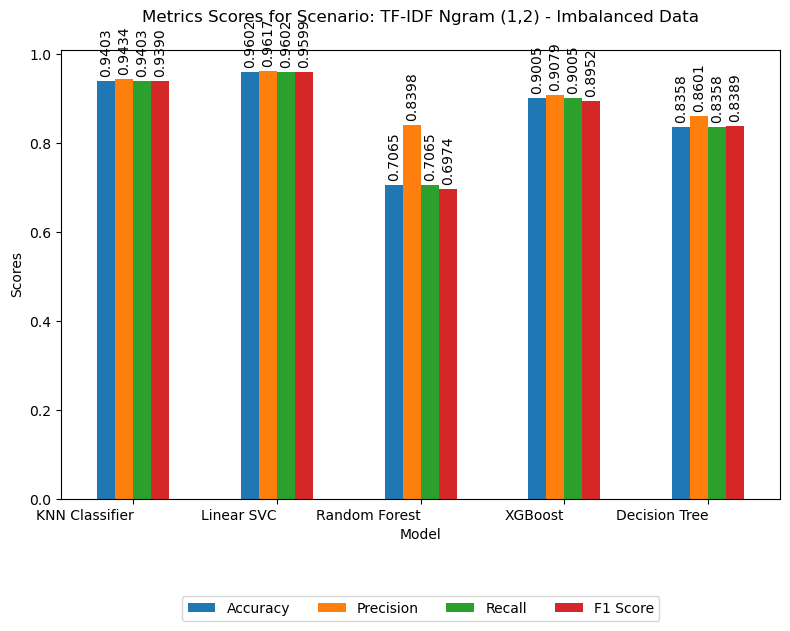

In [58]:
# Plotting barplots for 'Metrics Scores for Scenario: TF-IDF Ngram (1,2) - Imbalanced Data'
filtered_df = all_results.loc[all_results['Scenario'] == 'TF-IDF Ngram (1,2) - Imbalanced Data']
x_labels = filtered_df.columns[2:]
fig, ax = plt.subplots(figsize=(8, 6))
filtered_df.plot(x='Model', y=x_labels, kind='bar', ax=ax)
ax.set_title('Metrics Scores for Scenario: TF-IDF Ngram (1,2) - Imbalanced Data', pad=20) 
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
plt.xticks(rotation = 0, ha='right')
for i in ax.containers:
    ax.bar_label(i, fmt='%.4f', fontsize=10, padding=3, rotation=90)
plt.subplots_adjust(top=0.5)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=len(x_labels))
plt.tight_layout()
plt.show()

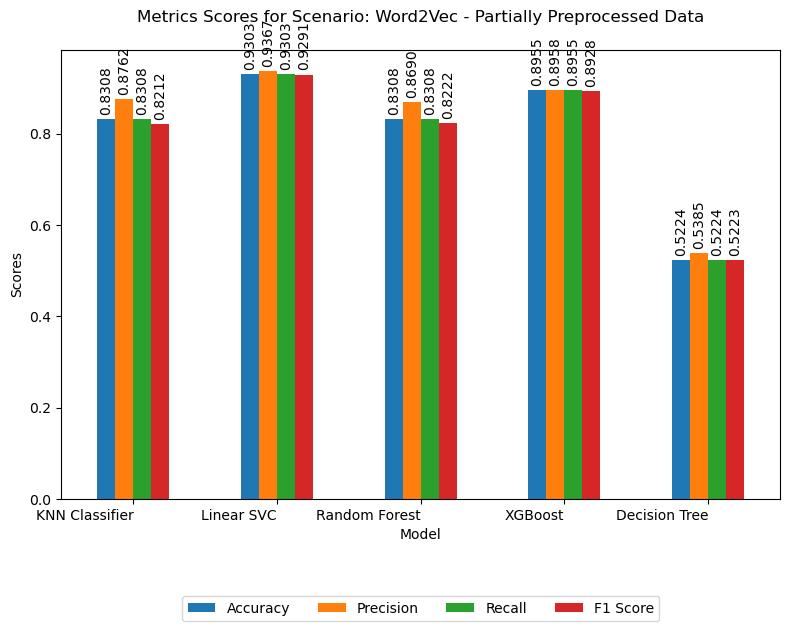

In [59]:
# Plotting barplots for 'Metrics Scores for Scenario: Word2Vec - Partially Preprocessed Data'
filtered_df = all_results.loc[all_results['Scenario'] == 'Word2Vec - Partially Preprocessed Data']
x_labels = filtered_df.columns[2:]
fig, ax = plt.subplots(figsize=(8, 6))
filtered_df.plot(x='Model', y=x_labels, kind='bar', ax=ax)
ax.set_title('Metrics Scores for Scenario: Word2Vec - Partially Preprocessed Data', pad=20) 
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
plt.xticks(rotation = 0, ha='right')
for i in ax.containers:
    ax.bar_label(i, fmt='%.4f', fontsize=10, padding=3, rotation=90)
plt.subplots_adjust(top=0.5)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=len(x_labels))
plt.tight_layout()
plt.show()

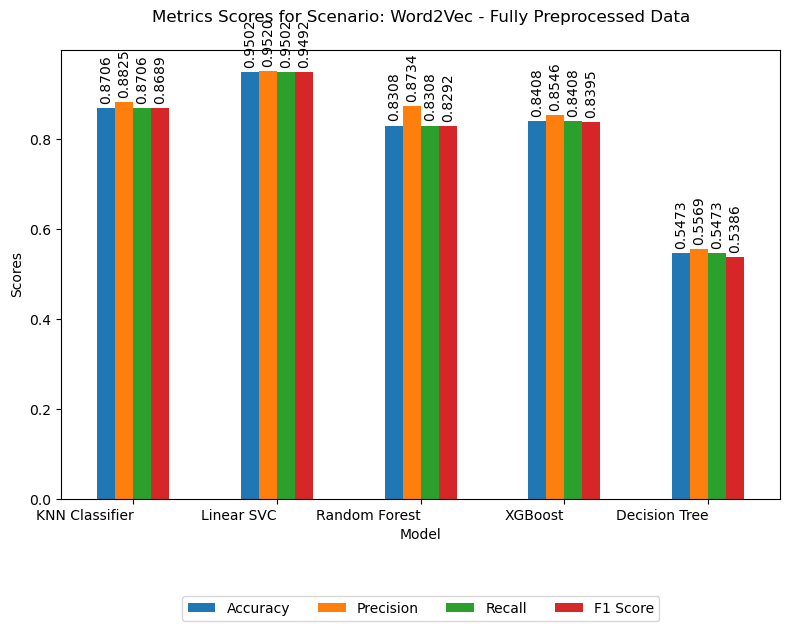

In [60]:
# Plotting barplots for 'Metrics Scores for Scenario: Word2Vec - Fully Preprocessed Data'
filtered_df = all_results.loc[all_results['Scenario'] == 'Word2Vec - Fully Preprocessed Data']
x_labels = filtered_df.columns[2:]
fig, ax = plt.subplots(figsize=(8, 6))
filtered_df.plot(x='Model', y=x_labels, kind='bar', ax=ax)
ax.set_title('Metrics Scores for Scenario: Word2Vec - Fully Preprocessed Data', pad=20) 
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
plt.xticks(rotation = 0, ha='right')
for i in ax.containers:
    ax.bar_label(i, fmt='%.4f', fontsize=10, padding=3, rotation=90)
plt.subplots_adjust(top=0.5)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=len(x_labels))
plt.tight_layout()
plt.show()

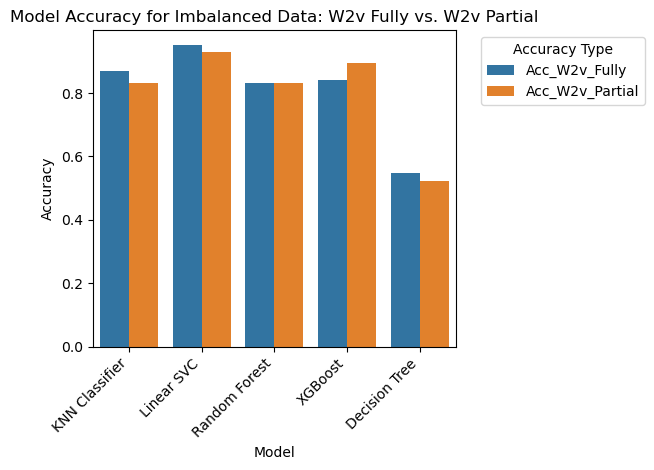

In [61]:
# Plotting Word2Vec Accuracy comparison for imbalanced dataset: fully and partial preprocessing
filtered_df1 = all_results.loc[all_results['Scenario'] == 'Word2Vec - Fully Preprocessed Data']
filtered_df2 = all_results.loc[all_results['Scenario'] == 'Word2Vec - Partially Preprocessed Data']

accuracy_column3 = filtered_df1[['Model','Accuracy']]
accuracy_column4 = filtered_df2[['Model','Accuracy']]
accuracy_column3 = accuracy_column3.rename(columns={'Accuracy': 'Acc_W2v_Fully'})
accuracy_column4 = accuracy_column4.rename(columns={'Accuracy': 'Acc_W2v_Partial'})
accuracy_column3 = pd.merge(accuracy_column3, accuracy_column4, on='Model')

accuracy_column3.set_index('Model', inplace=True)
accuracy_column3.reset_index(inplace=True)
accuracy_column3_long = accuracy_column3.melt(id_vars='Model', var_name='Accuracy Type', value_name='Accuracy')
sns.barplot(x='Model', y='Accuracy', hue='Accuracy Type', data=accuracy_column3_long)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy for Imbalanced Data: W2v Fully vs. W2v Partial')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Accuracy Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Small variation in the accuracy result for the fully and partially pre-processed driven models for imbalanced data

## 8.3 Modelling for balanced data and evaluation

Six experimental models will be built with the balanced data using the 6 classifier models
- 1. N-gram (1,1) will be used with BoW to build the models
- 2. N-gram (1,1) will be used with TF-IDF to build the models
- 3. N-gram (1,2) will be used with BoW to build the models
- 4. N-gram (1,2) will be used with TF-IDF to build the models
- 5. Partially preprocessed data will be used with Word2Vec to build the models
- 6. Fully preprocessed data will be used with Word2Vec to build the models

In [62]:
#N-GRAM 1,1 with balanced data
#==========================================================
# Classifier models using BoW method Ngram(1,1)
bowros11_result = fit_and_score2(models=models,
                             X_train=X_train_bogros,
                             X_test=X_test_bogros,
                             y_train=y_train_bogros,
                             y_test=y_testn)
print("Evaluation Metrics Result using with BoW n-gram (1,1) on balanced data \n")
print(bowros11_result)
print('*' * 60 ,'\n')

# Classifier models using TF-IDF method Ngram (1,1)
tfidfros11_result = fit_and_score2(models=models,
                             X_train=X_train_tfidfros,
                             X_test=X_test_tfidfros,
                             y_train=y_train_tfidfros,
                             y_test=y_testn)
print("Evaluation Metrics Result using with TF-IDF n-gram (1,1) on balanced data \n")
print(tfidfros11_result)
print('*' * 60 ,'\n')
#==========================================================

#N-GRAM 1,2 with balanced data
#==========================================================
# Classifier models using BoW method Ngram(1,2)
bowros12_result = fit_and_score2(models=models,
                             X_train=X_train_bogros_0,
                             X_test=X_test_bogros_0,
                             y_train=y_train_bogros_0,
                             y_test=y_testn)
print("Evaluation Metrics Result using with BoW n-gram (1,2) on balanced data \n")
print(bowros12_result)
print('*' * 60 ,'\n')

# Classifier models using TF-IDF method Ngram (1,2)
tfidfros12_result = fit_and_score2(models=models,
                             X_train=X_train_tfidfros_0,
                             X_test=X_test_tfidfros_0,
                             y_train=y_train_tfidfros_0,
                             y_test=y_testn)
print("Evaluation Metrics Result using with TF-IDF n-gram (1,2) on balanced data \n")
print(tfidfros12_result)
print('*' * 60 ,'\n')
#==========================================================

#Word2Vec with balanced data
#==========================================================
# Result for Classifier models using Word2Vec with partially preprocessed data.
W2vros_partial_result = fit_and_score2(models=models,
                             X_train=X_train_w2vros,
                             X_test=X_test_w2v,
                             y_train=y_train_vros,
                             y_test=y_testv)
print("Evaluation Metrics Result using with Word2Vec with partially preprocessed data on balanced data \n")
print(W2vros_partial_result)
print('*' * 60 ,'\n')

# Result for Classifier models using Word2Vec method - fully preprocessed training data
W2vros_fully_result = fit_and_score2(models=models,
                             X_train=X_train_w2vros_0,
                             X_test=X_test_w2v,
                             y_train=y_train_vros_0,
                             y_test=y_testv)
print("Evaluation Metrics Result using with Word2Vec with fully preprocessed data on balanced data \n")
print(W2vros_fully_result)
print('*' * 60 ,'\n')
#==========================================================

Evaluation Metrics Result using with BoW n-gram (1,1) on balanced data 

            Model  Accuracy  Precision    Recall  F1 Score
0  KNN Classifier  0.776119   0.829741  0.776119  0.769553
1      Linear SVC  0.925373   0.930289  0.925373  0.925546
2   Random Forest  0.930348   0.932931  0.930348  0.929924
3         XGBoost  0.925373   0.928735  0.925373  0.925402
4   Decision Tree  0.885572   0.906119  0.885572  0.891120
************************************************************ 

Evaluation Metrics Result using with TF-IDF n-gram (1,1) on balanced data 

            Model  Accuracy  Precision    Recall  F1 Score
0  KNN Classifier  0.835821   0.858373  0.835821  0.837879
1      Linear SVC  0.940299   0.942019  0.940299  0.939797
2   Random Forest  0.915423   0.920700  0.915423  0.916062
3         XGBoost  0.920398   0.925842  0.920398  0.919022
4   Decision Tree  0.825871   0.840799  0.825871  0.825415
************************************************************ 

Evaluation Metric

In [63]:
#Putting all the metric results for all the classifiers and the scenarios with balanced data together in a dataframe
all_results2 = pd.DataFrame(columns=["Scenario", "Model", "Accuracy", "Precision", "Recall", "F1 Score"])
all_results2 = pd.concat([all_results2, bowros11_result.assign(Scenario="BoW Ngram (1,1) - balanced Data")])
all_results2 = pd.concat([all_results2, tfidfros11_result.assign(Scenario="TF-IDF Ngram (1,1) - balanced Data")])
all_results2 = pd.concat([all_results2, bowros12_result.assign(Scenario="BoW Ngram (1,2) - balanced Data")])
all_results2 = pd.concat([all_results2, tfidfros12_result.assign(Scenario="TF-IDF Ngram (1,2) - balanced Data")])
all_results2 = pd.concat([all_results2, W2vros_partial_result.assign(Scenario="Word2Vec - Partially Preprocessed Data")])
all_results2 = pd.concat([all_results2, W2vros_fully_result.assign(Scenario="Word2Vec - Fully Preprocessed Data")])
all_results2.reset_index(drop=True, inplace=True)
# Save the DataFrame to an Excel file
all_results2.to_excel("balanced_metrics_results.xlsx", index=False)
all_results2

Scenario           Model  Accuracy  \
0          BoW Ngram (1,1) - balanced Data  KNN Classifier  0.776119   
1          BoW Ngram (1,1) - balanced Data      Linear SVC  0.925373   
2          BoW Ngram (1,1) - balanced Data   Random Forest  0.930348   
3          BoW Ngram (1,1) - balanced Data         XGBoost  0.925373   
4          BoW Ngram (1,1) - balanced Data   Decision Tree  0.885572   
5       TF-IDF Ngram (1,1) - balanced Data  KNN Classifier  0.835821   
6       TF-IDF Ngram (1,1) - balanced Data      Linear SVC  0.940299   
7       TF-IDF Ngram (1,1) - balanced Data   Random Forest  0.915423   
8       TF-IDF Ngram (1,1) - balanced Data         XGBoost  0.920398   
9       TF-IDF Ngram (1,1) - balanced Data   Decision Tree  0.825871   
10         BoW Ngram (1,2) - balanced Data  KNN Classifier  0.567164   
11         BoW Ngram (1,2) - balanced Data      Linear SVC  0.960199   
12         BoW Ngram (1,2) - balanced Data   Random Forest  0.925373   
13         BoW Ngram (1,2) - balanced Data         XGBoost  0.925373   
14         BoW Ngram (1,2) - balanced Data   Decision Tree  0.860697   
15      TF-IDF Ngram (1,2) - balanced Data  KNN Classifier  0.845771   
16      TF-IDF Ngram (1,2) - balanced Data      Linear SVC  0.965174   
17      TF-IDF Ngram (1,2) - balanced Data   Random Forest  0.895522   
18      TF-IDF Ngram (1,2) - balanced Data         XGBoost  0.900498   
19      TF-IDF Ngram (1,2) - balanced Data   Decision Tree  0.820896   
20  Word2Vec - Partially Preprocessed Data  KNN Classifier  0.825871   
21  Word2Vec - Partially Preprocessed Data      Linear SVC  0.945274   
22  Word2Vec - Partially Preprocessed Data   Random Forest  0.885572   
23  Word2Vec - Partially Preprocessed Data         XGBoost  0.870647   
24  Word2Vec - Partially Preprocessed Data   Decision Tree  0.512438   
25      Word2Vec - Fully Preprocessed Data  KNN Classifier  0.422886   
26      Word2Vec - Fully Preprocessed Data      Linear SVC  0.890547   
27      Word2Vec - Fully Preprocessed Data   Random Forest  0.641791   
28      Word2Vec - Fully Preprocessed Data         XGBoost  0.651741   
29      Word2Vec - Fully Preprocessed Data   Decision Tree  0.288557   

    Precision    Recall  F1 Score  
0    0.829741  0.776119  0.769553  
1    0.930289  0.925373  0.925546  
2    0.932931  0.930348  0.929924  
3    0.928735  0.925373  0.925402  
4    0.906119  0.885572  0.891120  
5    0.858373  0.835821  0.837879  
6    0.942019  0.940299  0.939797  
7    0.920700  0.915423  0.916062  
8    0.925842  0.920398  0.919022  
9    0.840799  0.825871  0.825415  
10   0.809960  0.567164  0.587676  
11   0.962783  0.960199  0.960031  
12   0.925770  0.925373  0.923268  
13   0.929934  0.925373  0.925061  
14   0.865568  0.860697  0.859860  
15   0.877828  0.845771  0.849449  
16   0.966642  0.965174  0.964865  
17   0.895422  0.895522  0.892193  
18   0.905258  0.900498  0.894727  
19   0.834546  0.820896  0.821775  
20   0.867151  0.825871  0.832014  
21   0.948493  0.945274  0.945500  
22   0.896286  0.885572  0.881894  
23   0.883607  0.870647  0.872161  
24   0.527912  0.512438  0.510869  
25   0.804358  0.422886  0.463392  
26   0.894768  0.890547  0.886899  
27   0.769512  0.641791  0.624757  
28   0.744396  0.651741  0.630025  
29   0.325634  0.288557  0.276194

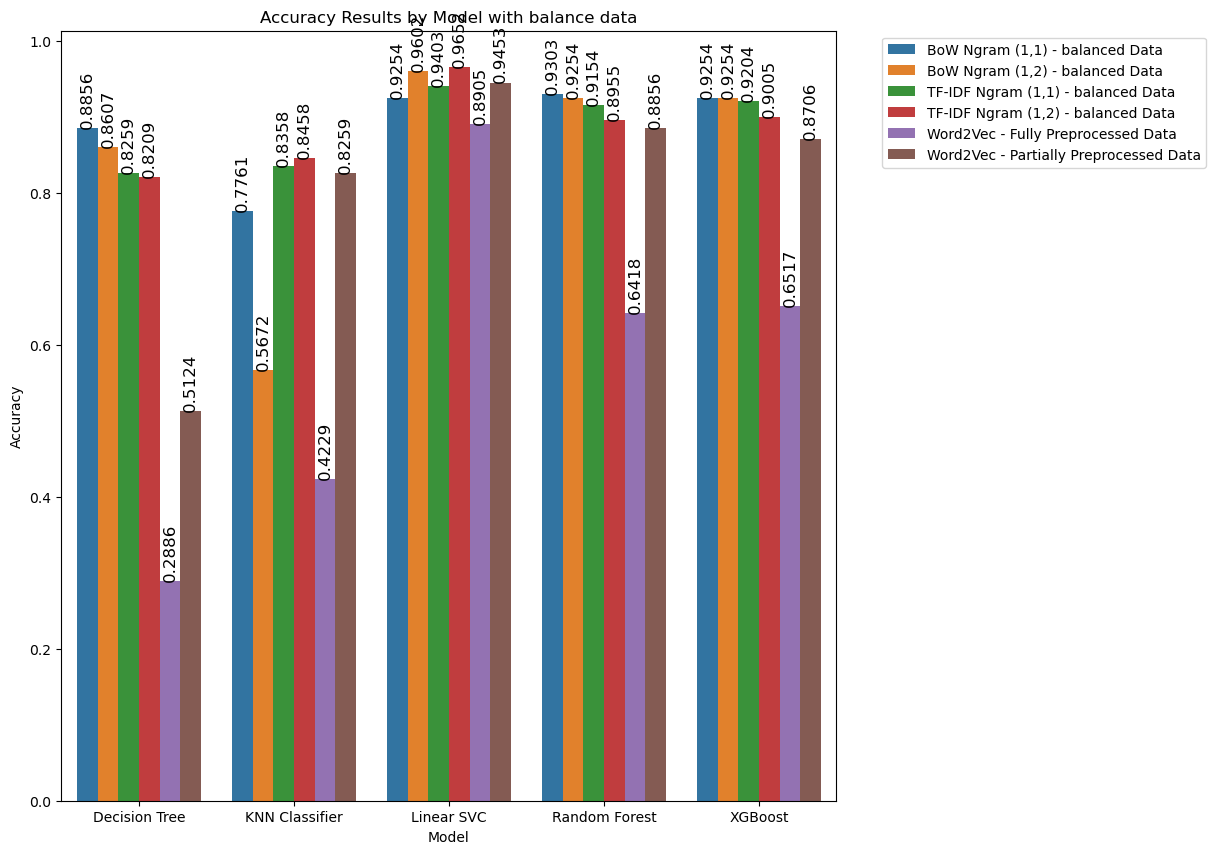

In [64]:
# PLotting the Accuracy Result
accuracy_data = all_results2.groupby(['Model', 'Scenario'])['Accuracy'].mean().reset_index()
plt.figure(figsize=(10, 10))
sns.barplot(data=accuracy_data, x='Model', y='Accuracy', hue='Scenario')
plt.title('Accuracy Results by Model with balance data')
plt.xlabel('Model')
plt.ylabel('Accuracy')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', fontsize=12, va='bottom', rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

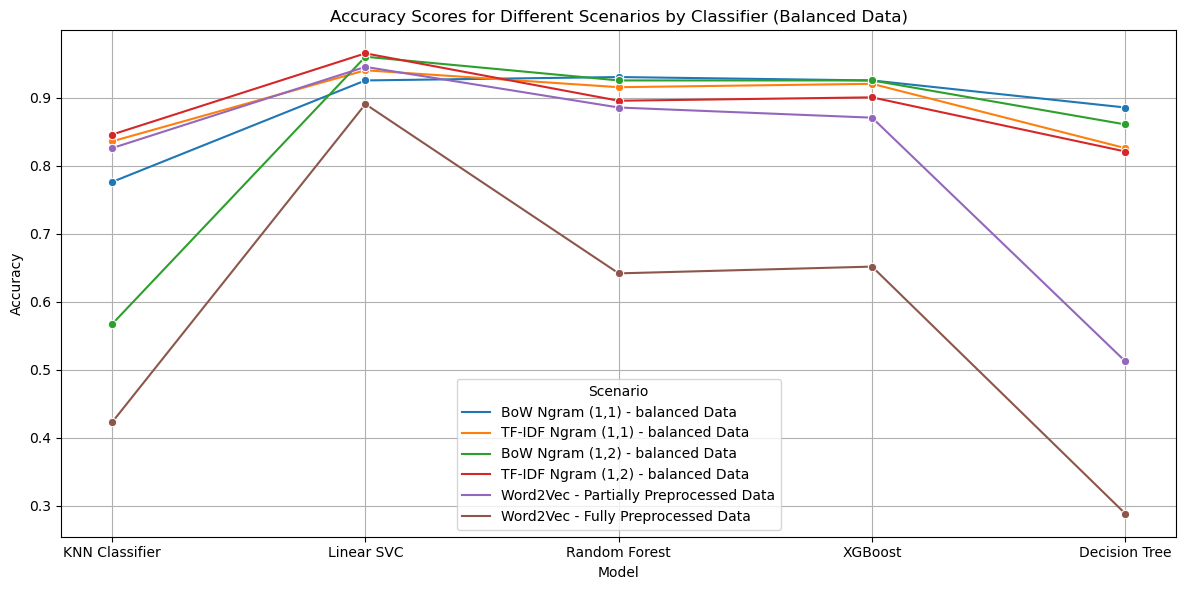

In [65]:
# Plotting the line graph for accuracy result with balanced data
plt.figure(figsize=(12, 6))
sns.lineplot(data=all_results2, x='Model', y='Accuracy', hue='Scenario', marker='o')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Different Scenarios by Classifier (Balanced Data)')
plt.xticks()
plt.tight_layout()
plt.grid(True) 
plt.show()

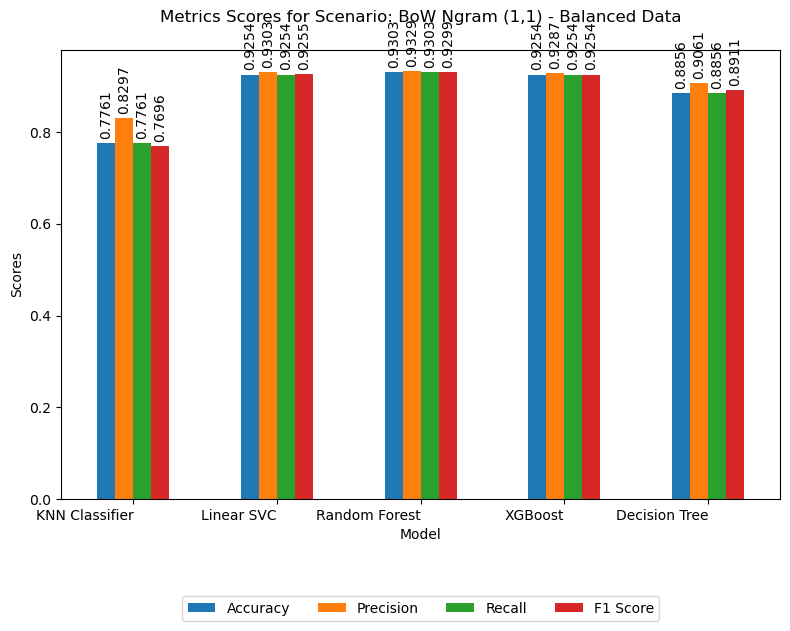

In [66]:
# Plotting barplots for 'Metrics Scores for Scenario: BoW Ngram (1,1) - Balanced Data'
filtered_df = all_results2.loc[all_results2['Scenario'] == 'BoW Ngram (1,1) - balanced Data']
x_labels = filtered_df.columns[2:]
fig, ax = plt.subplots(figsize=(8, 6))
filtered_df.plot(x='Model', y=x_labels, kind='bar', ax=ax)
ax.set_title('Metrics Scores for Scenario: BoW Ngram (1,1) - Balanced Data', pad=20)
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
plt.xticks(rotation = 0, ha='right')
for i in ax.containers:
    ax.bar_label(i, fmt='%.4f', fontsize=10, padding=3, rotation=90)
plt.subplots_adjust(top=0.5)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=len(x_labels))
plt.tight_layout()
plt.show()

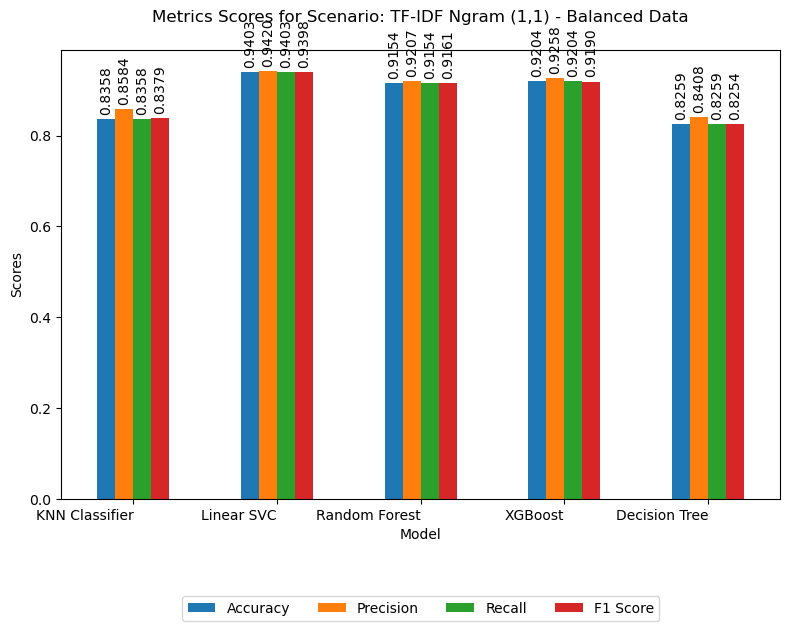

In [67]:
# Plotting barplots for 'Metrics Scores for Scenario: TF-IDF Ngram (1,1) - Balanced Data'
filtered_df = all_results2.loc[all_results2['Scenario'] == 'TF-IDF Ngram (1,1) - balanced Data']
x_labels = filtered_df.columns[2:]
fig, ax = plt.subplots(figsize=(8, 6))
filtered_df.plot(x='Model', y=x_labels, kind='bar', ax=ax)
ax.set_title('Metrics Scores for Scenario: TF-IDF Ngram (1,1) - Balanced Data', pad=20)
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
plt.xticks(rotation = 0, ha='right')
for i in ax.containers:
    ax.bar_label(i, fmt='%.4f', fontsize=10, padding=3, rotation=90)
plt.subplots_adjust(top=0.5)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=len(x_labels))
plt.tight_layout()
plt.show()

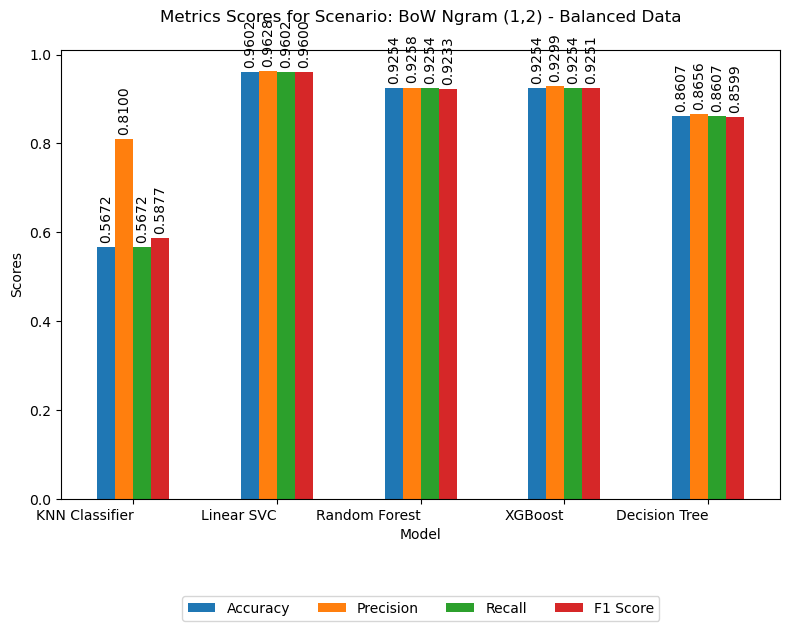

In [68]:
# Plotting barplots for 'Metrics Scores for Scenario: BoW Ngram (1,2) - Balanced Data'
filtered_df = all_results2.loc[all_results2['Scenario'] == 'BoW Ngram (1,2) - balanced Data']
x_labels = filtered_df.columns[2:]
fig, ax = plt.subplots(figsize=(8, 6))
filtered_df.plot(x='Model', y=x_labels, kind='bar', ax=ax)
ax.set_title('Metrics Scores for Scenario: BoW Ngram (1,2) - Balanced Data', pad=20)
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
plt.xticks(rotation = 0, ha='right')
for i in ax.containers:
    ax.bar_label(i, fmt='%.4f', fontsize=10, padding=3, rotation=90)
plt.subplots_adjust(top=0.5)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=len(x_labels))
plt.tight_layout()
plt.show()

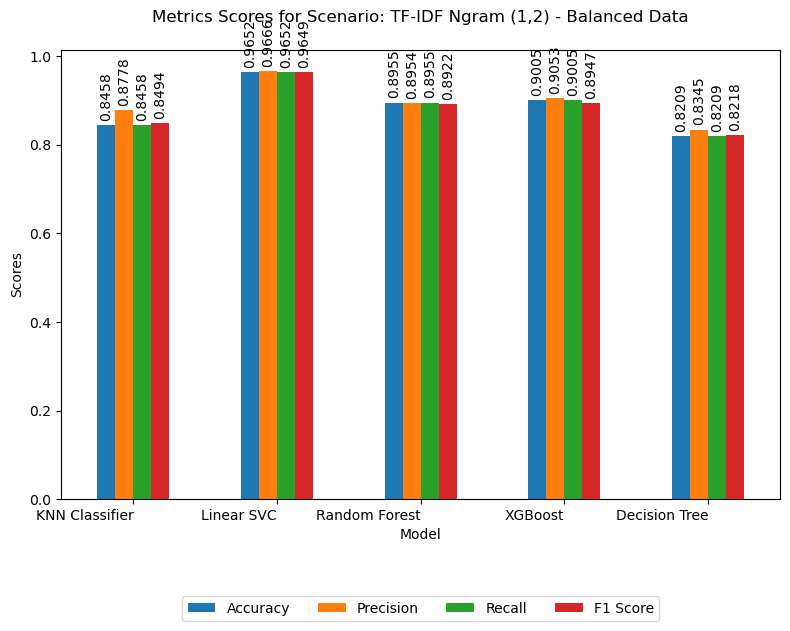

In [69]:
# Plotting barplots for 'Metrics Scores for Scenario: TF-IDF Ngram (1,2) - Balanced Data'
filtered_df = all_results2.loc[all_results2['Scenario'] == 'TF-IDF Ngram (1,2) - balanced Data']
x_labels = filtered_df.columns[2:]
fig, ax = plt.subplots(figsize=(8, 6))
filtered_df.plot(x='Model', y=x_labels, kind='bar', ax=ax)
ax.set_title('Metrics Scores for Scenario: TF-IDF Ngram (1,2) - Balanced Data', pad=20)
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
plt.xticks(rotation = 0, ha='right')
for i in ax.containers:
    ax.bar_label(i, fmt='%.4f', fontsize=10, padding=3, rotation=90)
plt.subplots_adjust(top=0.5)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=len(x_labels))
plt.tight_layout()
plt.show()

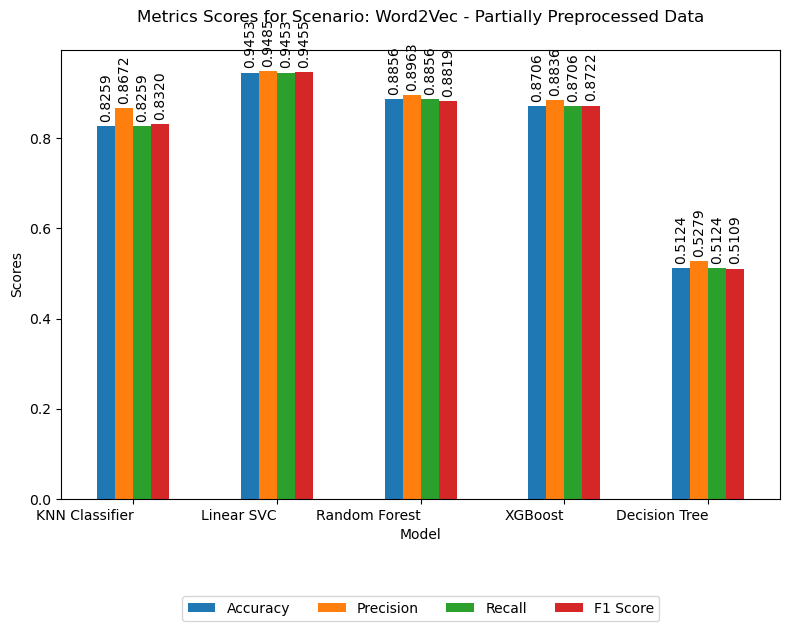

In [70]:
# Plotting barplots for 'Metrics Scores for Scenario: Word2Vec - Partially Preprocessed Data'
filtered_df = all_results2.loc[all_results2['Scenario'] == 'Word2Vec - Partially Preprocessed Data']
x_labels = filtered_df.columns[2:]
fig, ax = plt.subplots(figsize=(8, 6))
filtered_df.plot(x='Model', y=x_labels, kind='bar', ax=ax)
ax.set_title('Metrics Scores for Scenario: Word2Vec - Partially Preprocessed Data', pad=20)
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
plt.xticks(rotation = 0, ha='right')
for i in ax.containers:
    ax.bar_label(i, fmt='%.4f', fontsize=10, padding=3, rotation=90)
plt.subplots_adjust(top=0.5)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=len(x_labels))
plt.tight_layout()
plt.show()

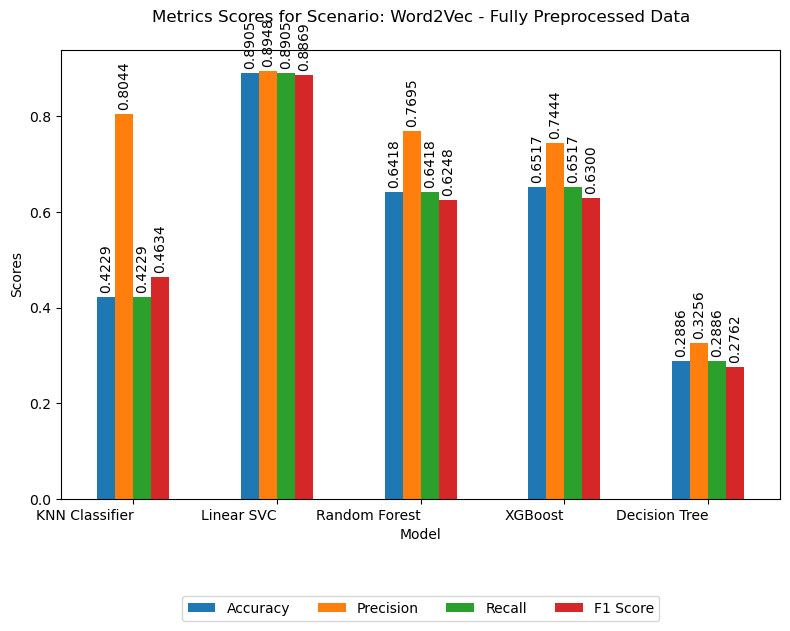

In [71]:
# Plotting barplots for 'Metrics Scores for Scenario: Word2Vec - Fully Preprocessed Data'
filtered_df = all_results2.loc[all_results2['Scenario'] == 'Word2Vec - Fully Preprocessed Data']
x_labels = filtered_df.columns[2:]
fig, ax = plt.subplots(figsize=(8, 6))
filtered_df.plot(x='Model', y=x_labels, kind='bar', ax=ax)
ax.set_title('Metrics Scores for Scenario: Word2Vec - Fully Preprocessed Data', pad=20)
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
plt.xticks(rotation = 0, ha='right')
for i in ax.containers:
    ax.bar_label(i, fmt='%.4f', fontsize=10, padding=3, rotation=90)
plt.subplots_adjust(top=0.5)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=len(x_labels))
plt.tight_layout()
plt.show()

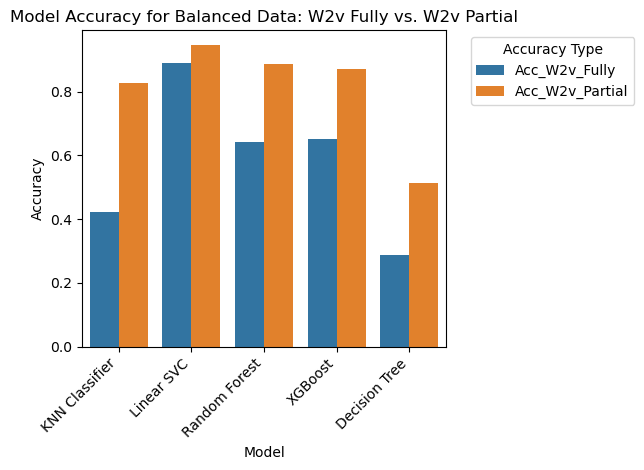

In [72]:
# Plotting Word2Vec Accuracy comparison for balanced dataset: fully and partial preprocessing
filtered_df1 = all_results2.loc[all_results2['Scenario'] == 'Word2Vec - Fully Preprocessed Data']
filtered_df2 = all_results2.loc[all_results2['Scenario'] == 'Word2Vec - Partially Preprocessed Data']

accuracy_column1 = filtered_df1[['Model','Accuracy']]
accuracy_column2 = filtered_df2[['Model','Accuracy']]
accuracy_column1 = accuracy_column1.rename(columns={'Accuracy': 'Acc_W2v_Fully'})
accuracy_column2 = accuracy_column2.rename(columns={'Accuracy': 'Acc_W2v_Partial'})
accuracy_column1 = pd.merge(accuracy_column1, accuracy_column2, on='Model')

accuracy_column1.set_index('Model', inplace=True)
accuracy_column1.reset_index(inplace=True)
accuracy_column1_long = accuracy_column1.melt(id_vars='Model', var_name='Accuracy Type', value_name='Accuracy')
sns.barplot(x='Model', y='Accuracy', hue='Accuracy Type', data=accuracy_column1_long)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy for Balanced Data: W2v Fully vs. W2v Partial')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Accuracy Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

With balanced data, models that used features extracted with Word2Vec that adopted partially pre-processed data performed extremely better than the models that used fully preprocessed data

## 8.4 Confusion Matrix Evaluation

### Confusion matrix for best classifier model witn the unbalanced data - BoW n-gram (1,2)

CLASSIFICATIION METRICS WITH BEST MODEL FROM IMBALANCED DATA SCENARIO

                                   precision    recall  f1-score   support

   Academic Support and Resources    0.92683   0.95000   0.93827        40
             Athletics and sports    1.00000   1.00000   1.00000        23
             Career opportunities    1.00000   1.00000   1.00000        19
                Financial Support    0.89474   0.94444   0.91892        18
    Health and Well-being Support    1.00000   0.82353   0.90323        17
International student experiences    1.00000   1.00000   1.00000        17
                  Online learning    0.84615   1.00000   0.91667        11
                  Student Affairs    1.00000   0.87500   0.93333         8
       Housing and Transportation    1.00000   0.92857   0.96296        14
        Activities and Travelling    1.00000   1.00000   1.00000         5
                Food and Cantines    0.96667   1.00000   0.98305        29

                         ac

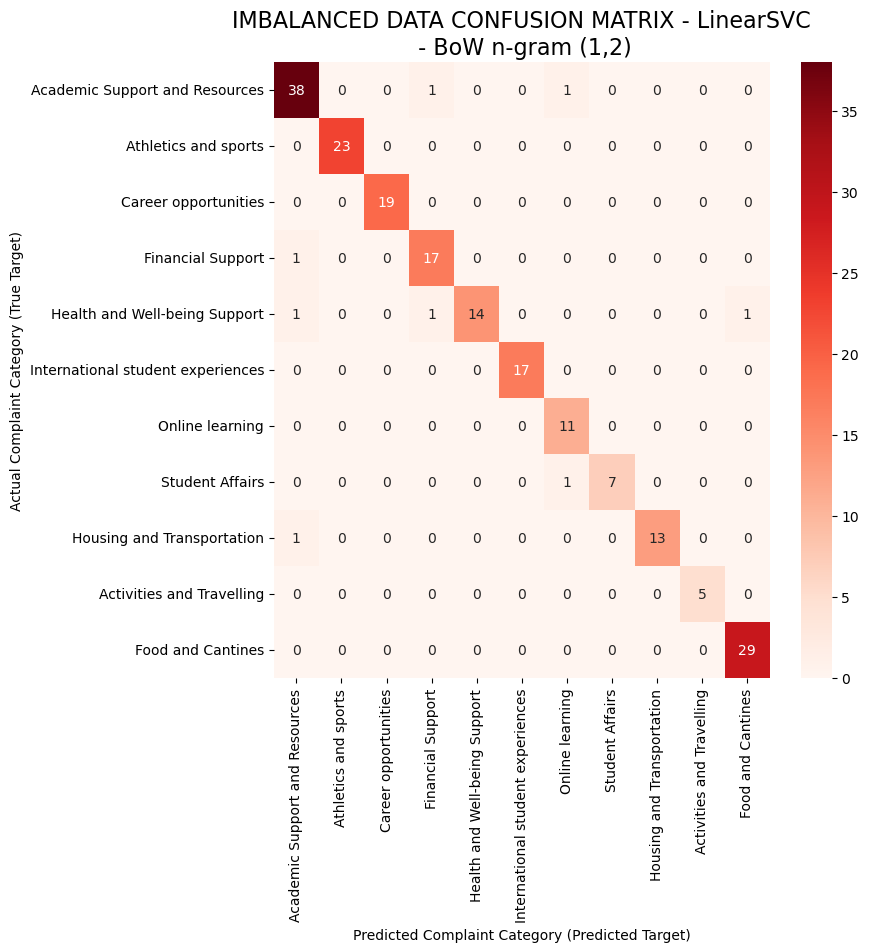

In [73]:
# LinearSVC using BoW n-gram (1,2) gave the best algorithm in term of precision, accuracy and F1-score
modelbest_im = LinearSVC()
modelbest_im.fit(X_train_bog_0, y_trainn)
y_pred1 = modelbest_im.predict(X_test_bog_0)

# Classification report
print('CLASSIFICATIION METRICS WITH BEST MODEL FROM IMBALANCED DATA SCENARIO\n')
print(metrics.classification_report(y_testn, y_pred1, 
                                    target_names= label_df['Genre'].unique(), digits=5))

#Confusion matrix
conf_mat = confusion_matrix(y_testn, y_pred1)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Reds", fmt='d',
            xticklabels=label_df.Genre.values, 
            yticklabels=label_df.Genre.values)
plt.ylabel('Actual Complaint Category (True Target)')
plt.xlabel('Predicted Complaint Category (Predicted Target)')
plt.title("IMBALANCED DATA CONFUSION MATRIX - LinearSVC\n - BoW n-gram (1,2)", size=16);

### Confusion matrix for best classifier model witn the balanced data - TF-IDF n-gram (1,2)

CLASSIFICATIION METRICS WITH BEST MODEL FROM BALANCED DATA SCENARIO

                                   precision    recall  f1-score   support

   Academic Support and Resources     0.9268    0.9500    0.9383        40
             Athletics and sports     1.0000    1.0000    1.0000        23
             Career opportunities     1.0000    1.0000    1.0000        19
                Financial Support     0.8947    0.9444    0.9189        18
    Health and Well-being Support     1.0000    0.8235    0.9032        17
International student experiences     1.0000    1.0000    1.0000        17
                  Online learning     0.9167    1.0000    0.9565        11
                  Student Affairs     1.0000    1.0000    1.0000         8
       Housing and Transportation     1.0000    0.9286    0.9630        14
        Activities and Travelling     1.0000    1.0000    1.0000         5
                Food and Cantines     0.9667    1.0000    0.9831        29

                         accu

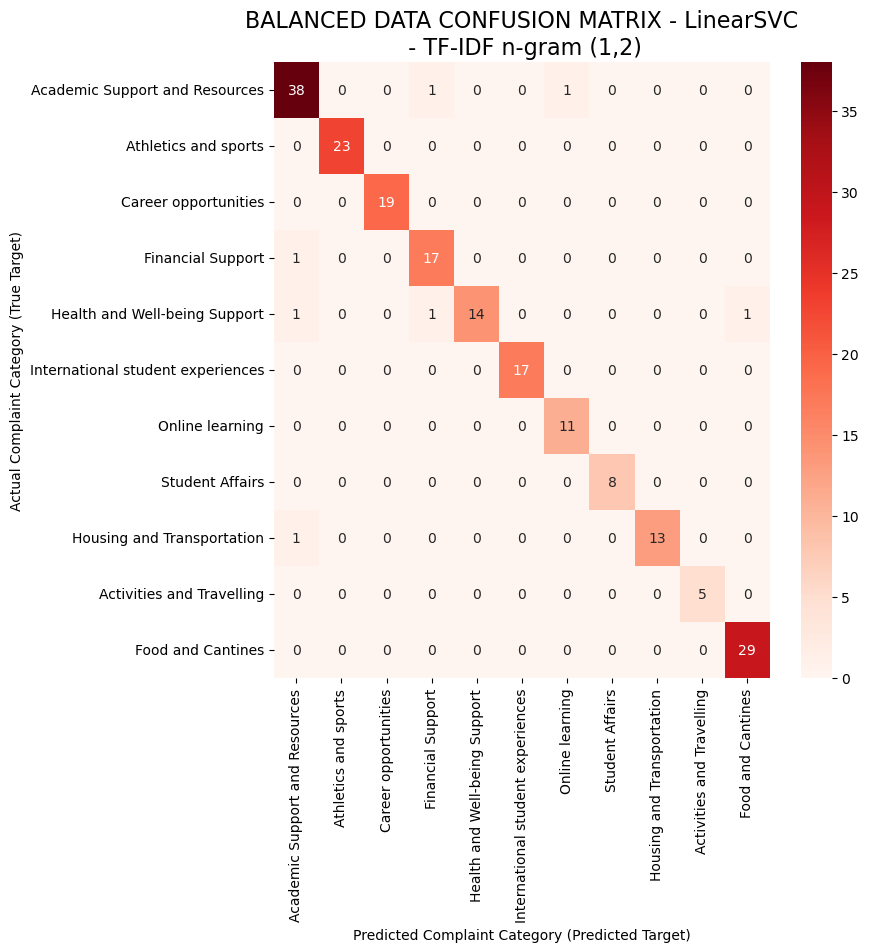

In [74]:
# LinearSVC using TF-IDF n-gram (1,2) gave the best algorithm in term of precision, accuracy and F1-score
modelbest = LinearSVC()
modelbest.fit(X_train_tfidfros_0, y_train_tfidfros_0)
y_pred = modelbest.predict(X_test_tfidfros_0)

# Classification report
print('CLASSIFICATIION METRICS WITH BEST MODEL FROM BALANCED DATA SCENARIO\n')
print(metrics.classification_report(y_testn, y_pred, 
                                    target_names= label_df['Genre'].unique(), digits=4))

#Confusion matrix
conf_mat = confusion_matrix(y_testn, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Reds", fmt='d',
            xticklabels=label_df.Genre.values, 
            yticklabels=label_df.Genre.values)
plt.ylabel('Actual Complaint Category (True Target)')
plt.xlabel('Predicted Complaint Category (Predicted Target)')
plt.title("BALANCED DATA CONFUSION MATRIX - LinearSVC\n - TF-IDF n-gram (1,2)", size=16);


## 8.5 k-fold Cross-validation testing

In [75]:
# TF-IDF vectorization with N-gram (1,2) for the entire complaint report
vectorizer_cv = TfidfVectorizer(ngram_range = (1, 2))
Xx = vectorizer_cv.fit_transform(X)

In [76]:
#modelling with stratified cross-validation of 10-fold (k-10)
modelcv = [
    RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    LinearSVC(),
    KNeighborsClassifier(),
    XGBClassifier(),
    DecisionTreeClassifier()
]


# 10 Cross-validation
CV = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
df_cv = pd.DataFrame(index=range(10 * len(modelcv)))
entries = []
for model in modelcv:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, Xx, y, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
df_cv = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [77]:
#generating and printing the result
mean_accuracy = df_cv.groupby('model_name').accuracy.mean()
std_accuracy = df_cv.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

Mean Accuracy  Standard deviation
model_name                                               
DecisionTreeClassifier       0.846762            0.024945
KNeighborsClassifier         0.901564            0.025988
LinearSVC                    0.947277            0.019266
RandomForestClassifier       0.743307            0.029071
XGBClassifier                0.921327            0.029610

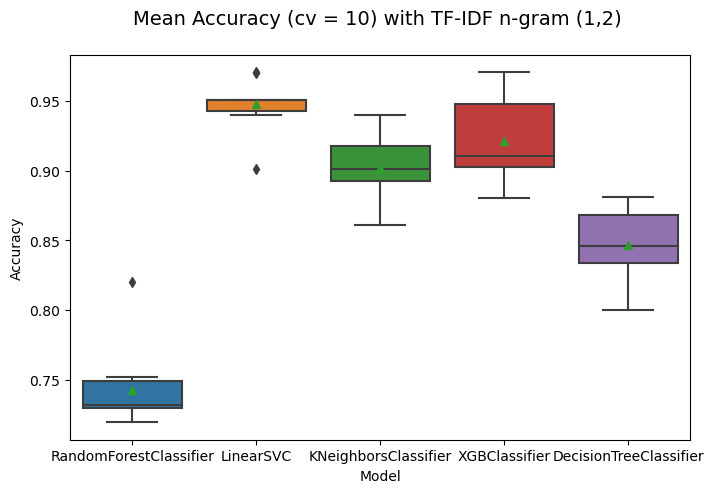

In [78]:
#plotting the accuracy scores for the cross validation modelling
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=df_cv,
            showmeans=True)
plt.xlabel('Model')
plt.ylabel('Accuracy')
#plt.xticks(rotation=45, ha='right')
plt.title("Mean Accuracy (cv = 10) with TF-IDF n-gram (1,2) \n", size=14);

### TF-IDF n-gram (1,2)-based Linear SVC model still had the best performance with the 10-fold cross-validation.  In conclusion LinearSVC is the adopted model for the classification of the university student complaint in this project.